In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/final_customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
print(df.shape)

(227657, 12)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227657 entries, 0 to 227656
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         227657 non-null  int64  
 1   Age                227657 non-null  float64
 2   Gender             227657 non-null  object 
 3   Tenure             227657 non-null  float64
 4   Usage Frequency    227657 non-null  float64
 5   Support Calls      227657 non-null  float64
 6   Payment Delay      227657 non-null  float64
 7   Subscription Type  227657 non-null  object 
 8   Contract Length    227657 non-null  object 
 9   Total Spend        227657 non-null  float64
 10  Last Interaction   227657 non-null  float64
 11  Churn              227657 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 20.8+ MB
None


In [7]:
df.describe(include=["object"])

,Gender,Subscription Type,Contract Length
count,227657,227657,227657
unique,2,3,3
top,Female,Standard,Monthly
freq,117025,76152,78260


In [8]:
df["Churn"].value_counts()

,count
Churn,
1.0,191639
0.0,36018


In [9]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
1.0,0.841788
0.0,0.158212


In [10]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [11]:
gender_count = df['Gender'].value_counts()
gender_pct= gender_count / len(df.index)

gender = pd.concat([gender_count, round(gender_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1)
gender

,count,pct
Gender,,
Female,117025,0.51
Male,110632,0.49


In [12]:
sub_type_count = df['Subscription Type'].value_counts()
sub_type_pct= sub_type_count / len(df.index)

sub_type = pd.concat([sub_type_count, round(sub_type_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1)
sub_type

,count,pct
Subscription Type,,
Standard,76152,0.33
Premium,75945,0.33
Basic,75560,0.33


In [13]:
cont_length_count = df['Contract Length'].value_counts()
cont_length_pct= cont_length_count / len(df.index)

cont_length = pd.concat([cont_length_count, round(cont_length_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1)
cont_length

,count,pct
Contract Length,,
Monthly,78260,0.34
Annual,75249,0.33
Quarterly,74148,0.33


In [17]:
!pip install pySankey

In [14]:
def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['pct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()

In [15]:
count_by_group(df, feature = 'Gender', target = 'Churn')

,Gender,Churn,count,pct
0,Female,0.0,16177,13.823542
1,Female,1.0,100848,86.176458
2,Male,0.0,19841,17.934232
3,Male,1.0,90791,82.065768


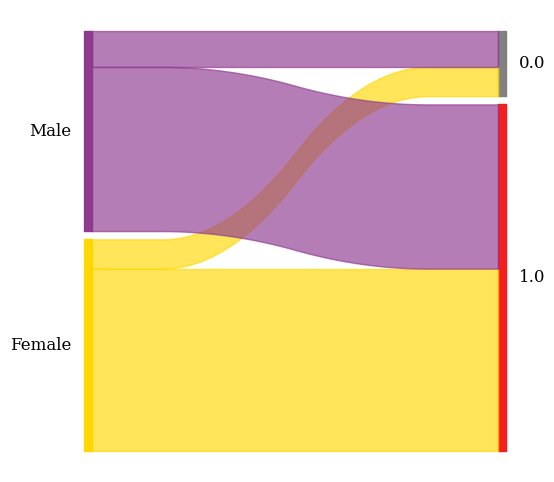

In [19]:
from pySankey.sankey import sankey
import pandas as pd
pd.options.display.max_rows = 8

colorDict = {
    'Female':'#FFD700',
    'Male':'#8E388E',
    '1.0': '#f71b1b',
    '0.0': 'grey'
}
df['Churn'] = df['Churn'].astype(str)

sankey(
    df['Gender'], df['Churn'], aspect=20, colorDict=colorDict,
    fontsize=12, figure_name="Gender"
)

In [20]:
count_by_group(df, feature = 'Subscription Type', target = 'Churn')

,Subscription Type,Churn,count,pct
0,Basic,0.0,11769,15.575701
1,Basic,1.0,63791,84.424299
2,Premium,0.0,12201,16.065574
3,Premium,1.0,63744,83.934426
4,Standard,0.0,12048,15.820990
5,Standard,1.0,64104,84.179010


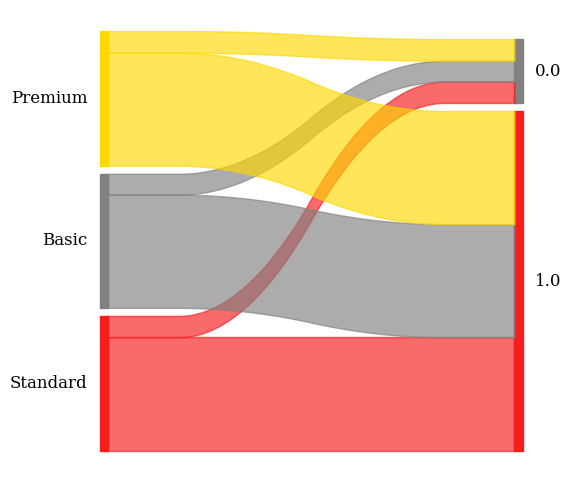

In [18]:
from pySankey.sankey import sankey
import pandas as pd
pd.options.display.max_rows = 8

colorDict = {
    'Standard':'#f71b1b',
    'Basic':'grey',
    'Premium':'#FFD700',
    '1.0': '#f71b1b',
    '0.0': 'grey'
}
df['Churn'] = df['Churn'].astype(str)

sankey(
    df['Subscription Type'], df['Churn'], aspect=20, colorDict=colorDict,
    fontsize=12, figure_name="Gender"
)

In [21]:
count_by_group(df, feature = 'Contract Length', target = 'Churn')

,Contract Length,Churn,count,pct
0,Annual,0.0,12599,16.743080
1,Annual,1.0,62650,83.256920
2,Monthly,0.0,10709,13.683874
3,Monthly,1.0,67551,86.316126
4,Quarterly,0.0,12710,17.141393
5,Quarterly,1.0,61438,82.858607


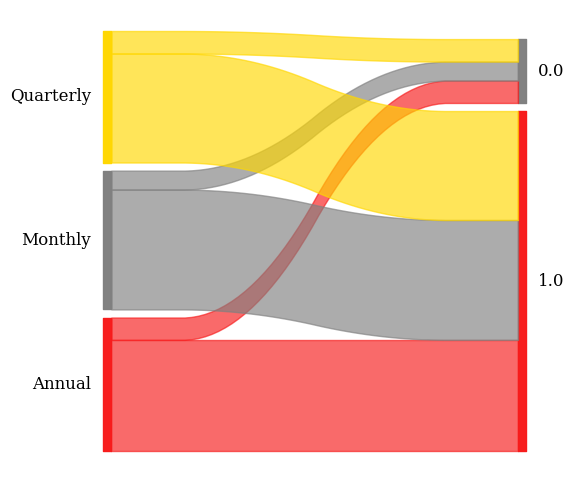

In [22]:
from pySankey.sankey import sankey
import pandas as pd
pd.options.display.max_rows = 8

colorDict = {
    'Annual':'#f71b1b',
    'Monthly':'grey',
    'Quarterly':'#FFD700',
    '1.0': '#f71b1b',
    '0.0': 'grey'
}
df['Churn'] = df['Churn'].astype(str)

sankey(
    df['Contract Length'], df['Churn'], aspect=20, colorDict=colorDict,
    fontsize=12, figure_name="Gender"
)

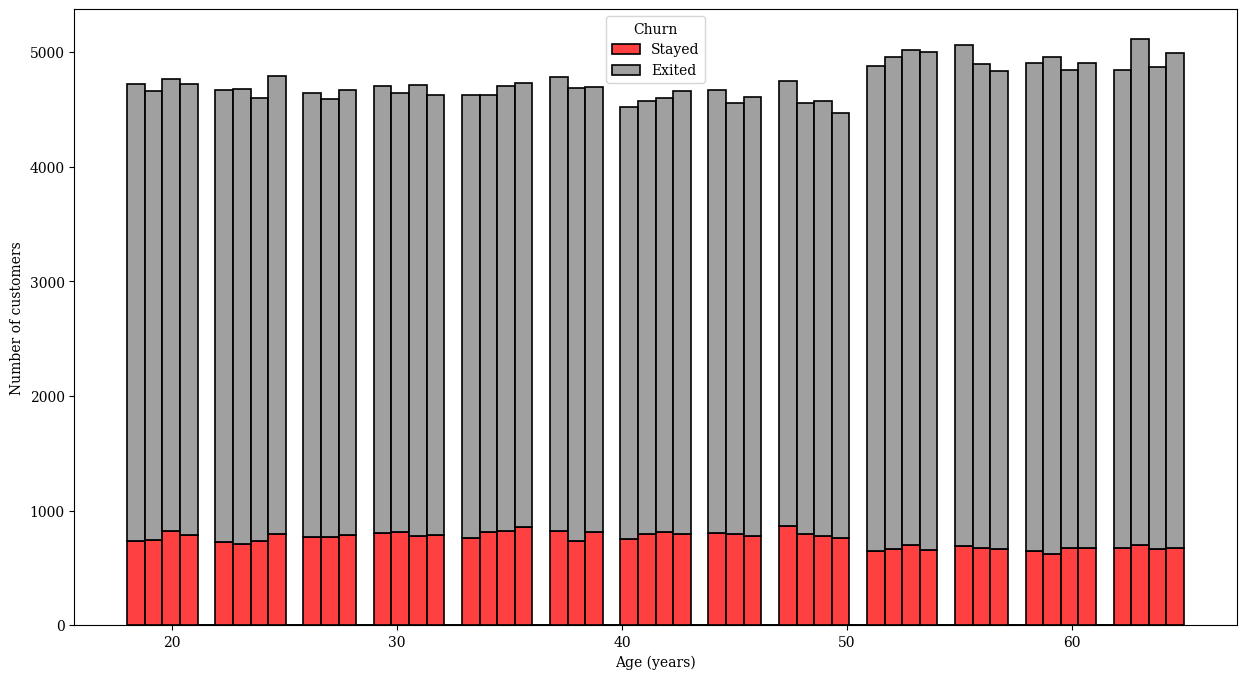

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

sns.histplot(data=df, x='Age', hue='Churn',
             multiple="stack", palette=['grey', 'r'],
             bins='auto', edgecolor='black', linewidth=1.2)

plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend(title='Churn', labels=['Stayed', 'Exited'])
plt.show()

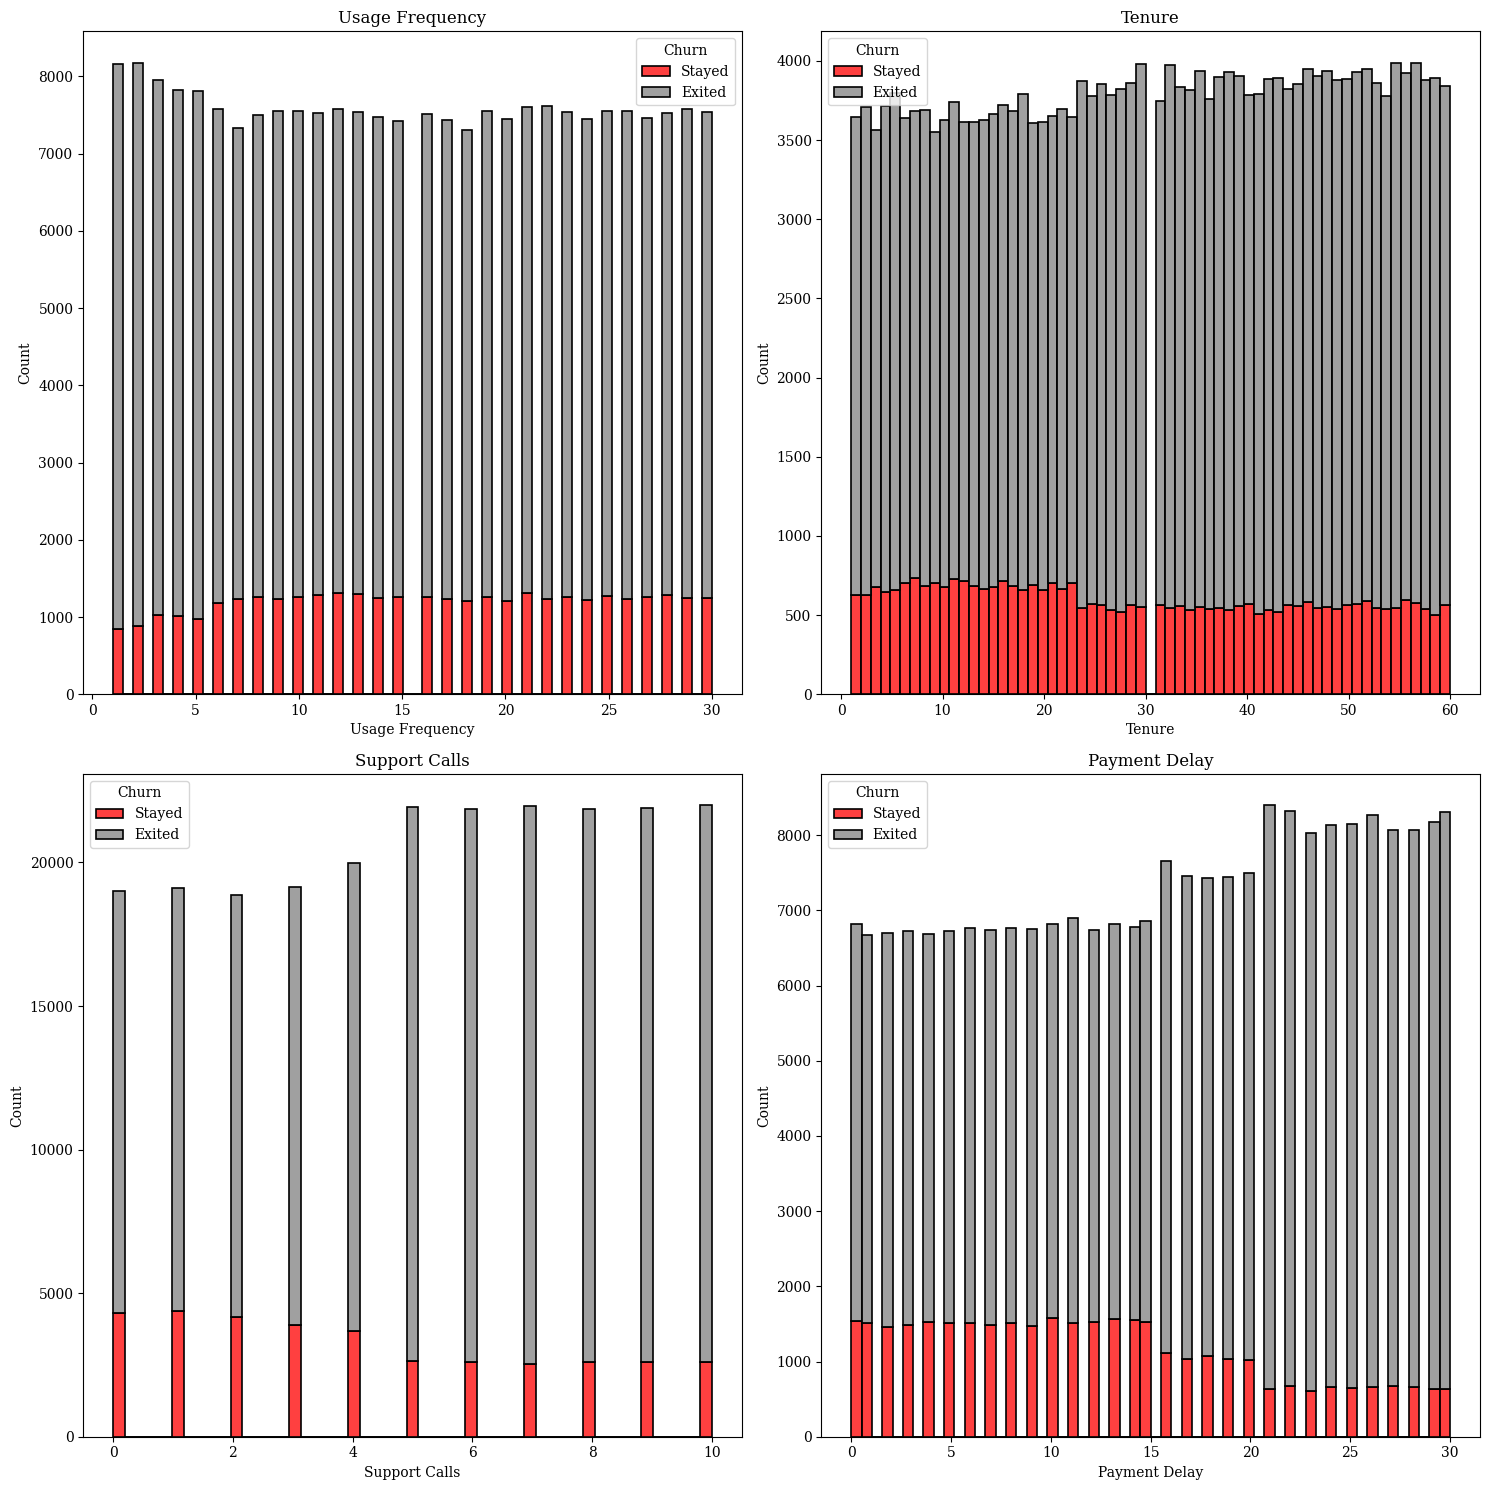

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.subplots_adjust(left=0.2, wspace=0.6)
ax0, ax1, ax2, ax3 = axes.flatten()

sns.histplot(
    data=df,
    x='Usage Frequency',
    hue='Churn',
    multiple="stack",
    palette=['grey', 'r'],
    bins='auto',
    edgecolor='black',
    linewidth=1.2,
    ax=ax0
)
ax0.legend(title='Churn', labels=['Stayed', 'Exited'])
ax0.set_title('Usage Frequency')

sns.histplot(data=df, x='Tenure', hue='Churn', multiple="stack", palette=['grey', 'r'], bins='auto', edgecolor='black', linewidth=1.2, ax=ax1)
ax1.legend(title='Churn', labels=['Stayed', 'Exited'])
ax1.set_title('Tenure')

sns.histplot(data=df, x='Support Calls', hue='Churn', multiple="stack", palette=['grey', 'r'], bins='auto', edgecolor='black', linewidth=1.2, ax=ax2)
ax2.legend(title='Churn', labels=['Stayed', 'Exited'])
ax2.set_title('Support Calls')

sns.histplot(data=df, x='Payment Delay', hue='Churn', multiple="stack", palette=['grey', 'r'], bins='auto', edgecolor='black', linewidth=1.2, ax=ax3)
ax3.legend(title='Churn', labels=['Stayed', 'Exited'])
ax3.set_title('Payment Delay')

fig.tight_layout()
plt.show()

#EDA
#### Summary statistics
#### Missing Data Analysis
#### Distribution of Continuous Variables
#### Correlation Matrix
#### Handling Categorical Variables

In [25]:
summary_stats = df.describe()
summary_stats

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000
mean,69266.725438,41.761163,30.929956,15.376189,5.187128,15.712045,543.516413,15.546080
std,48516.792229,13.938336,17.284771,8.717090,3.141194,8.976491,259.813965,8.653985
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,28462.000000,30.000000,16.000000,8.000000,2.000000,8.000000,318.000000,8.000000
50%,57446.000000,42.000000,31.000000,15.000000,5.000000,16.000000,538.000000,16.000000
75%,109605.000000,54.000000,46.000000,23.000000,8.000000,24.000000,769.000000,23.000000
max,168093.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


In [26]:
missing_data = df.isnull().sum()
missing_data

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
...,...
Contract Length,0
Total Spend,0
Last Interaction,0
Churn,0


In [59]:
def plot_noise(df):
    fig = plt.figure(figsize = (30,10))
    viz_noise = df.drop('CustomerID', axis=1).describe().transpose().reset_index()
    sns.barplot(data=viz_noise, x='index', y='std')
    plt.xlabel('Columns')
    plt.ylabel('Std.')
    plt.title('Viz of std')
    plt.xticks(rotation=45)
    plt.show()

def plot_outlayers(df):
    fig = plt.figure(figsize = (30,10))
    viz_outlayers = df.drop('CustomerID', axis=1)
    sns.boxplot(data=viz_outlayers)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.title('Viz of IQR')
    plt.xticks(rotation=45)
    plt.show()

def plot_target_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    palette_color = sns.color_palette()[0:2]
    plt.pie(df.attrition_flag.value_counts(), labels = ['No Churn', 'Churn'],
            autopct = '%.1f%%',
            radius = 1,
            textprops={'fontsize': 20, 'fontweight': 'bold'},
            colors=palette_color
            )
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)

    order = df.attrition_flag.value_counts().sort_values(ascending=False).index
    t = sns.barplot(x=df.attrition_flag.value_counts().index,
                    y=df.attrition_flag.value_counts().values,
                    order=order)
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

def plot_dis(df, feature):
    palette_color = reversed(sns.color_palette()[0:2])
    ax = sns.displot(data=df,
                     x=feature,
                    #  hue='attrition_flag',
                     kde=True,
                     bins=40,
                     lw = 2,
                     legend = True,
                     height=10,
                     aspect=2,
                     palette=palette_color
                     ).set(title=f"KDE Plot: {feature}")
    ax.set_titles(f"Distribution Plot: {feature}", fontsize = 30, fontweight = 'bold')
    plt.xlabel(f"{feature}", fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

def plot_cat_feature(df, feature):

    fig = plt.figure(figsize = (30,10))
    plt.subplot(131)
    plt.pie(df[feature].value_counts(), labels = df[feature].unique() , autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title(f"{feature} Composition of Overall Data", fontweight = 'bold', fontsize = 30)

    plt.subplot(132)
    palette_color = reversed(sns.color_palette()[0:2])
    g = df.copy()
    g = g.groupby(feature)['attrition_flag'].value_counts().to_frame()
    g = g.rename({'attrition_flag':'at_total'}, axis = 1).reset_index()
    t = sns.barplot(data = g, x = feature, y = 'at_total', hue = 'attrition_flag', palette=palette_color)
    t.set_title(f"Churn by {feature}", fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    plt.xticks(rotation=45)
    t.set_ylabel('Num of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = df[feature].unique(), fontweight = 'bold', fontsize = 20)

    plt.subplot(133)
    palette_color = reversed(sns.color_palette()[0:2])
    x = sns.violinplot(data = df, x = feature, y = 'total_trans_ct', hue = 'attrition_flag', split = True, palette=palette_color)
    x.set_title(f"Total Transactions by {feature}", fontsize = 30, fontweight = 'bold')
    x.set_xlabel(f"{feature}")
    plt.xticks(rotation=45)
    x.set_ylabel('Total Transactions', fontsize = 20, fontweight = 'bold')
    x.set_xticklabels(labels =df[feature].unique() , fontsize = 20, fontweight = 'bold')

    plt.tight_layout()

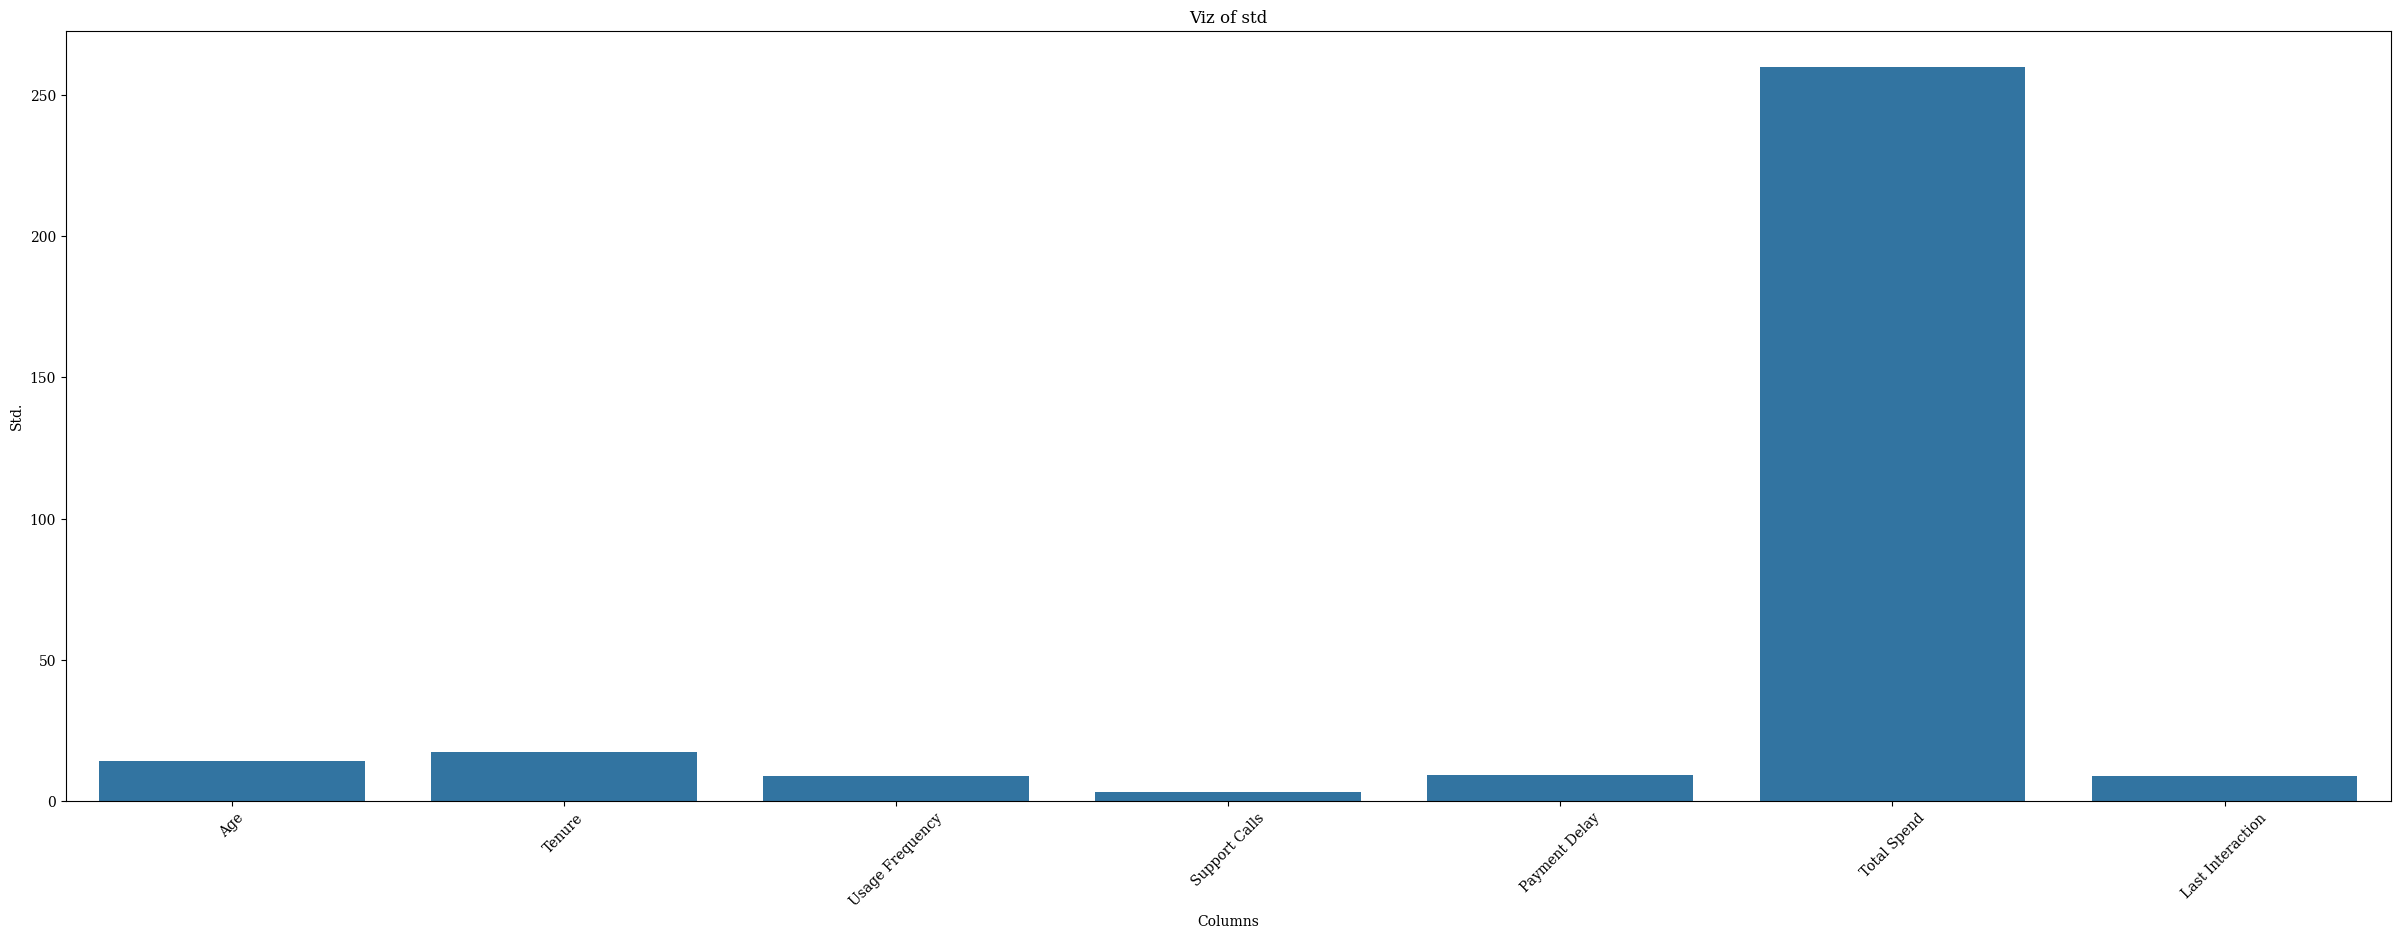

In [31]:
#Plot Stochastic Noise
plot_noise(df)

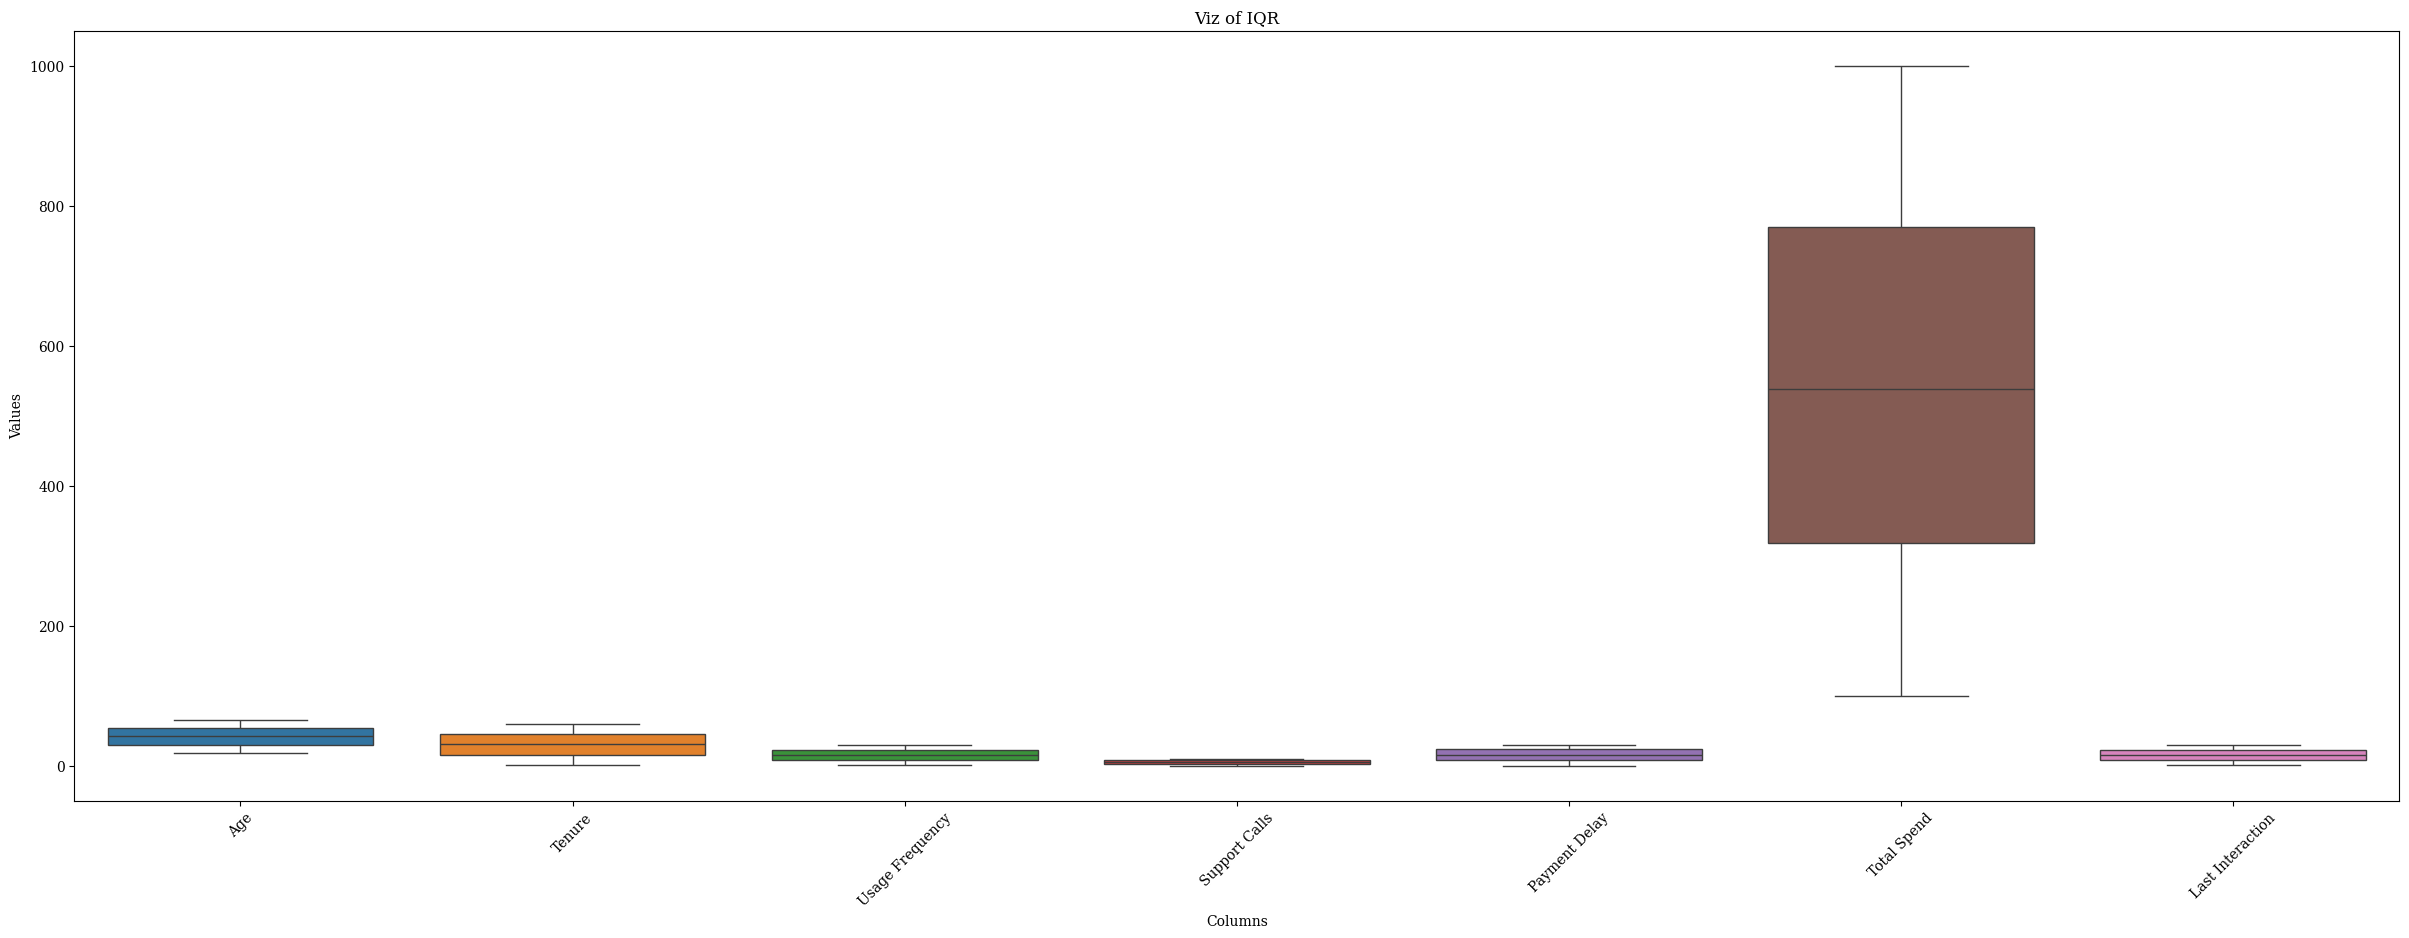

In [32]:
#Plot Outlayers
plot_outlayers(df)

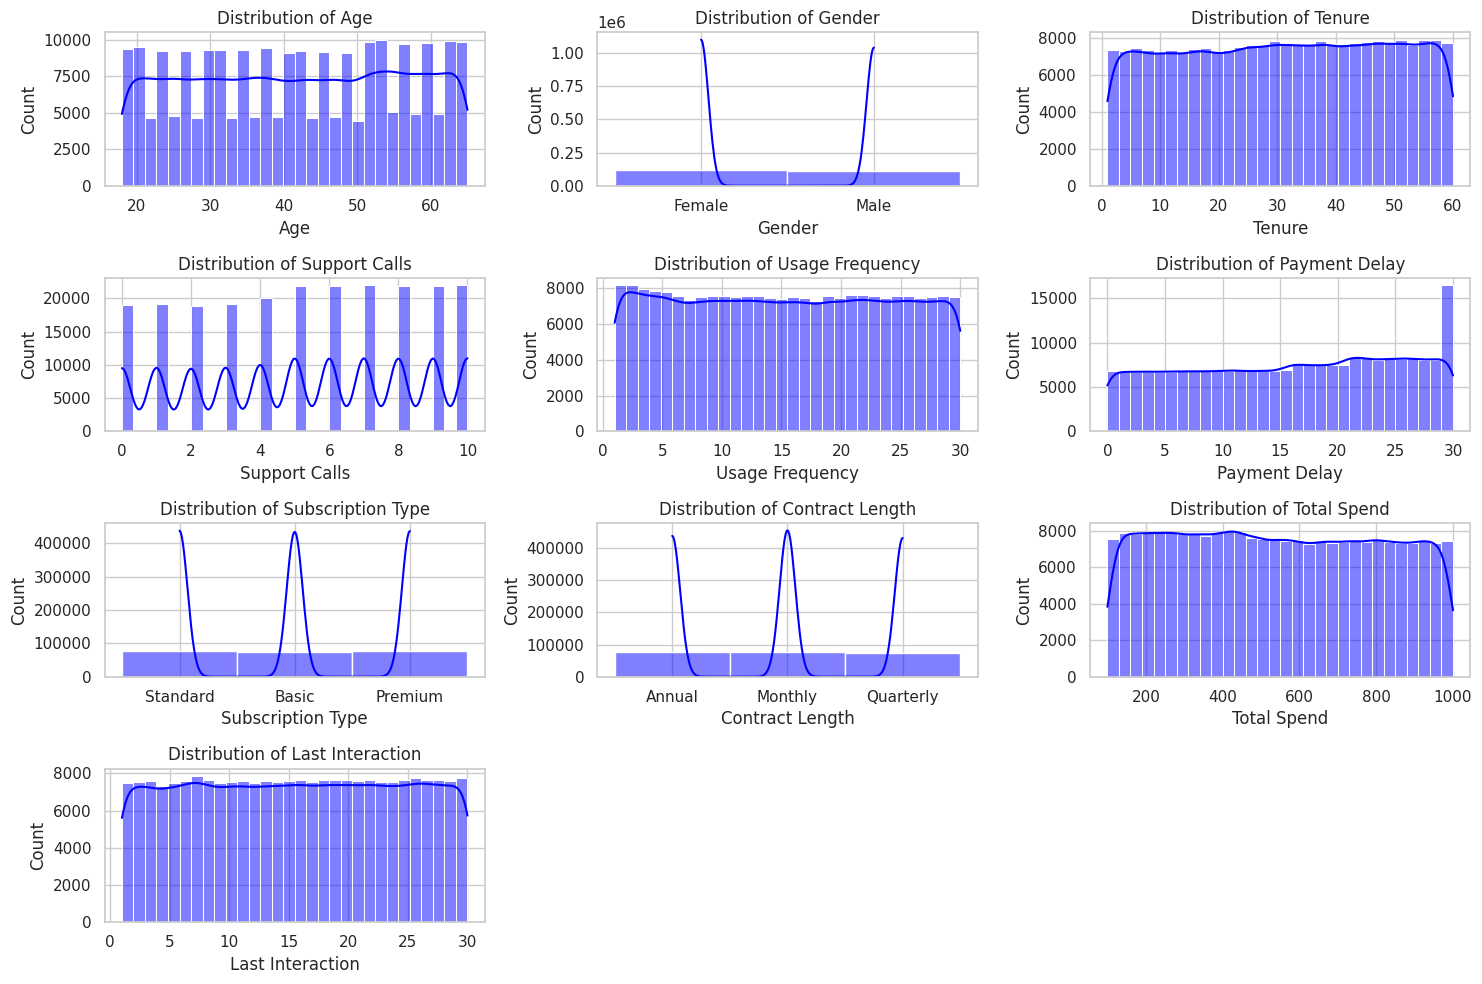

In [36]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

continuous_cols = ['Age', 'Gender', 'Tenure', 'Support Calls', 'Usage Frequency', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


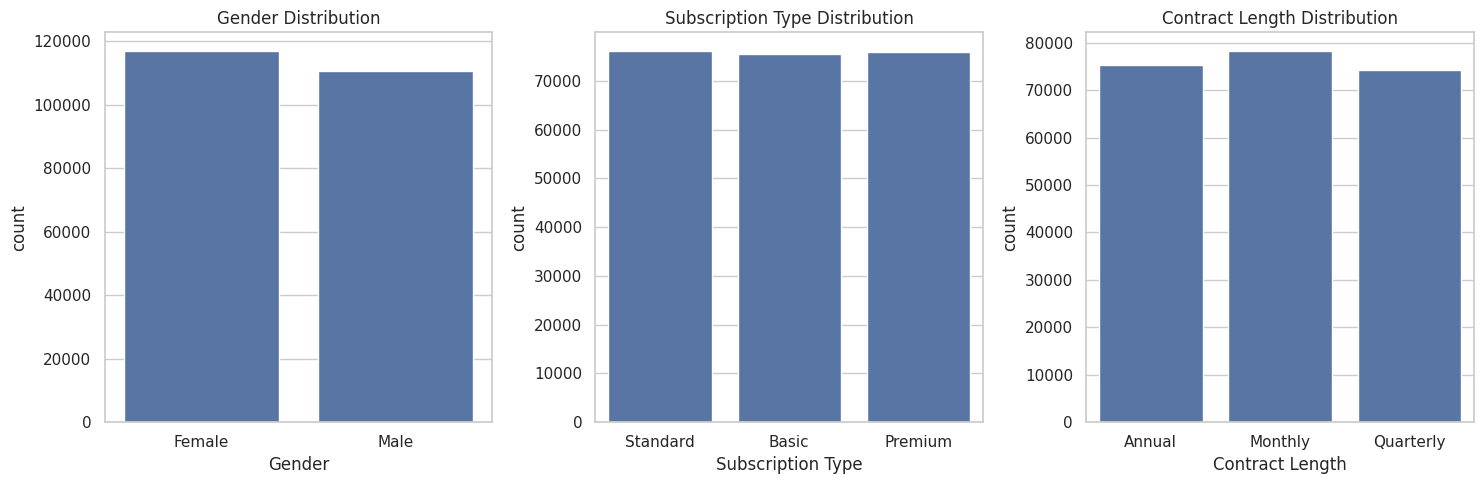

In [38]:
# Plotting distributions of categorical variables
plt.figure(figsize=(15, 5))

# Gender Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

# Subscription Type Distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Subscription Type', data=df)
plt.title('Subscription Type Distribution')

# Contract Length Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Contract Length', data=df)
plt.title('Contract Length Distribution')

plt.tight_layout()
plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['Gender', 'Subscription Type', 'Contract Length']:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [54]:
numerical_features = df.drop(['CustomerID'], axis=1)

<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-input-59-078135c1be02>:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=df,
<ipython-inpu

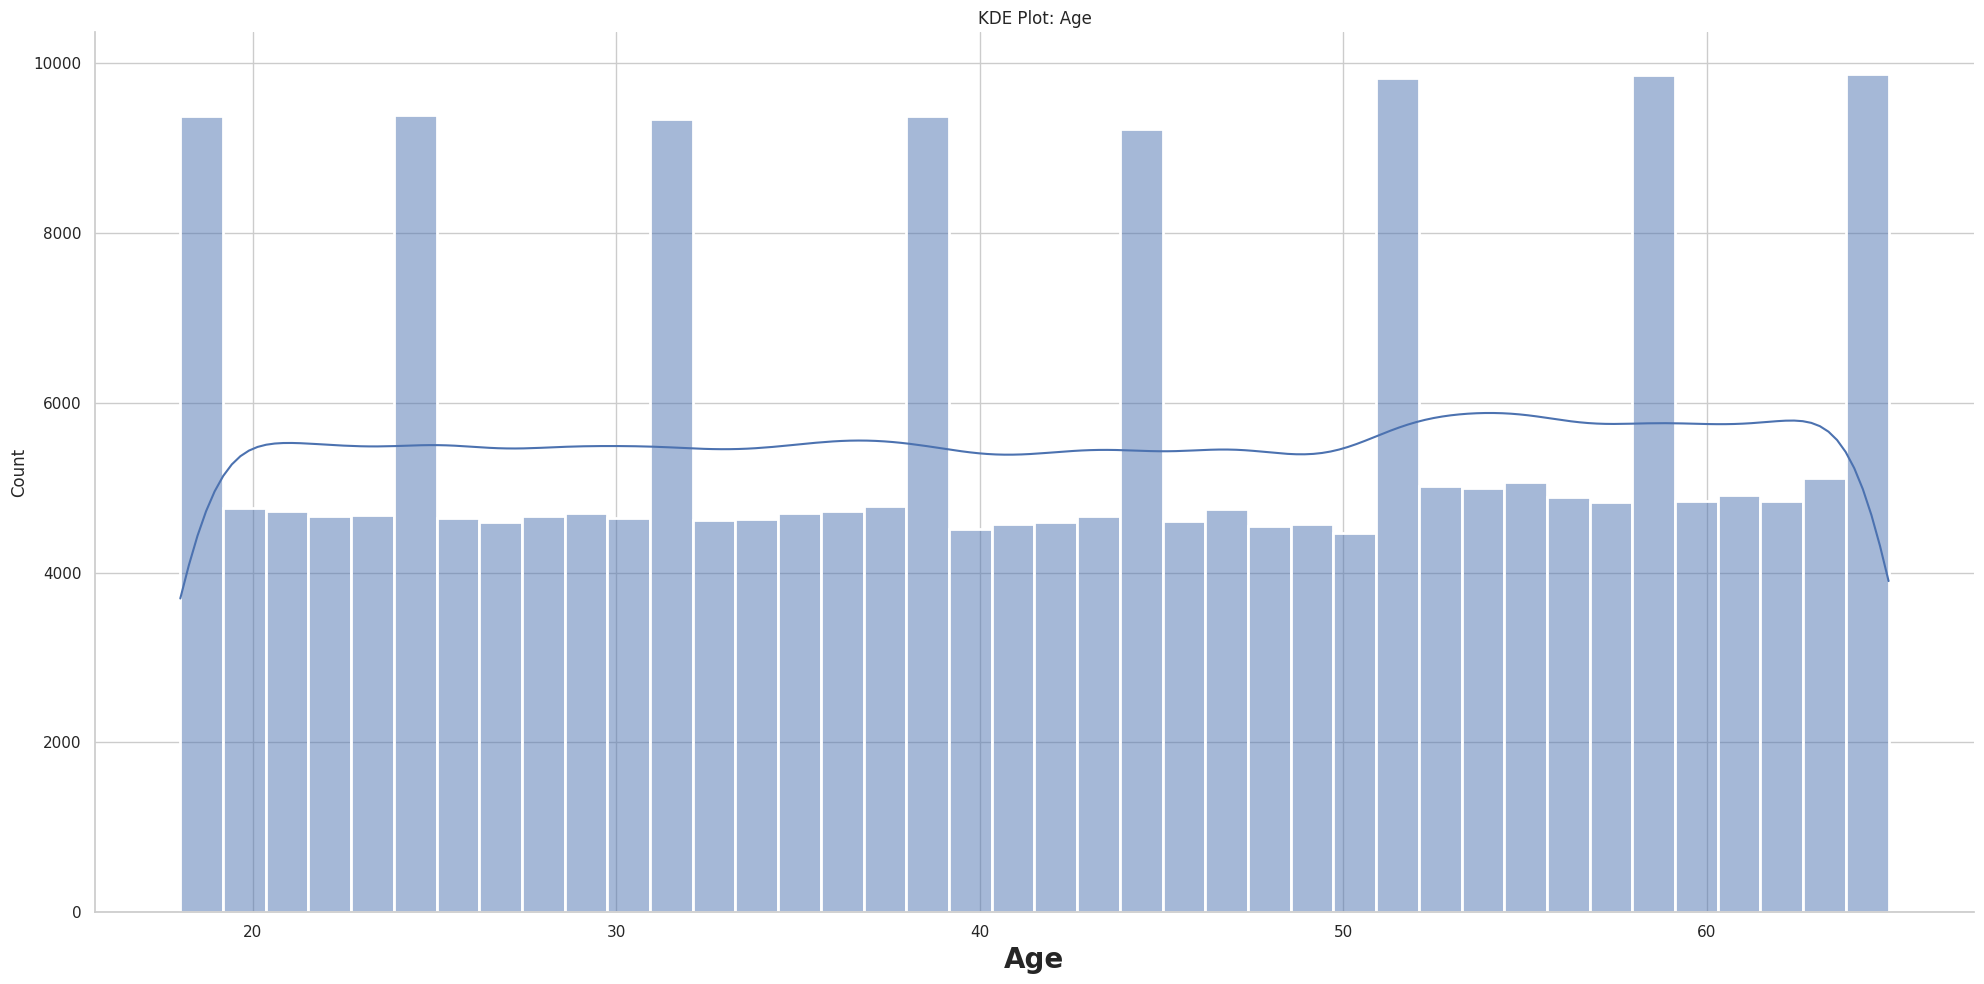

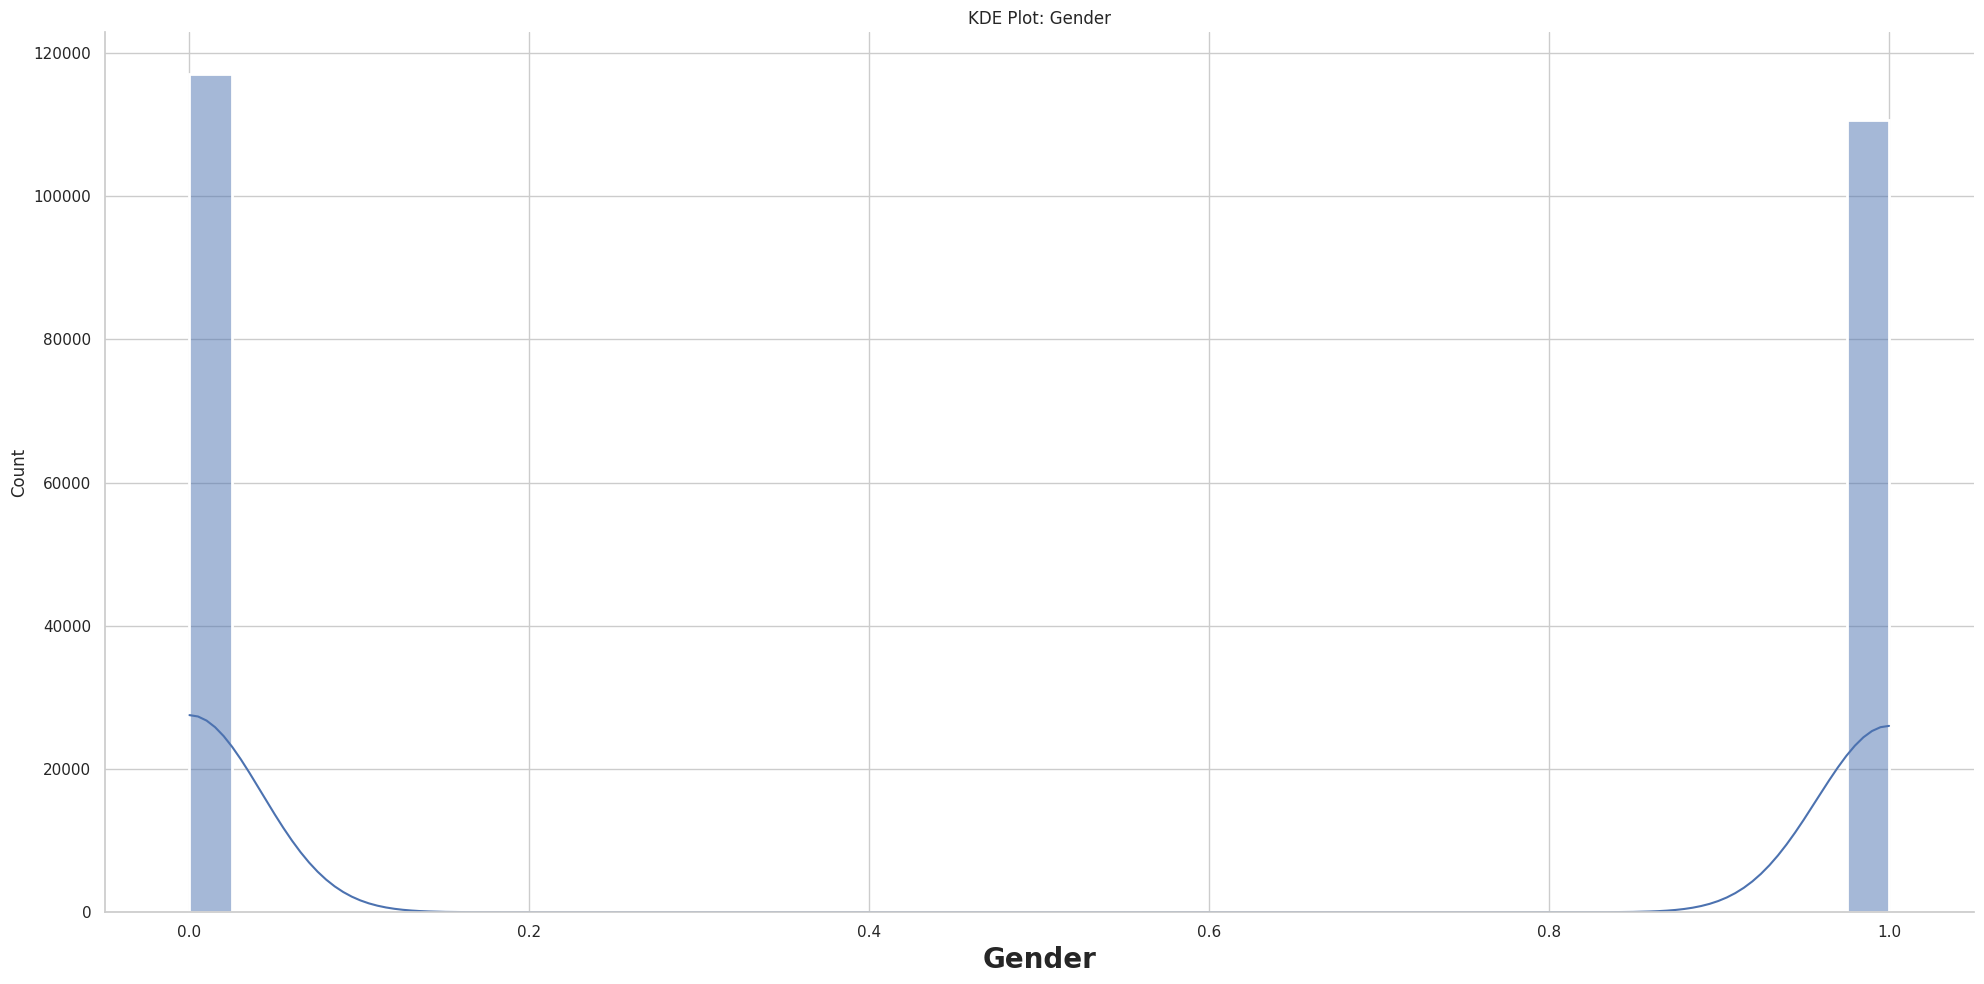

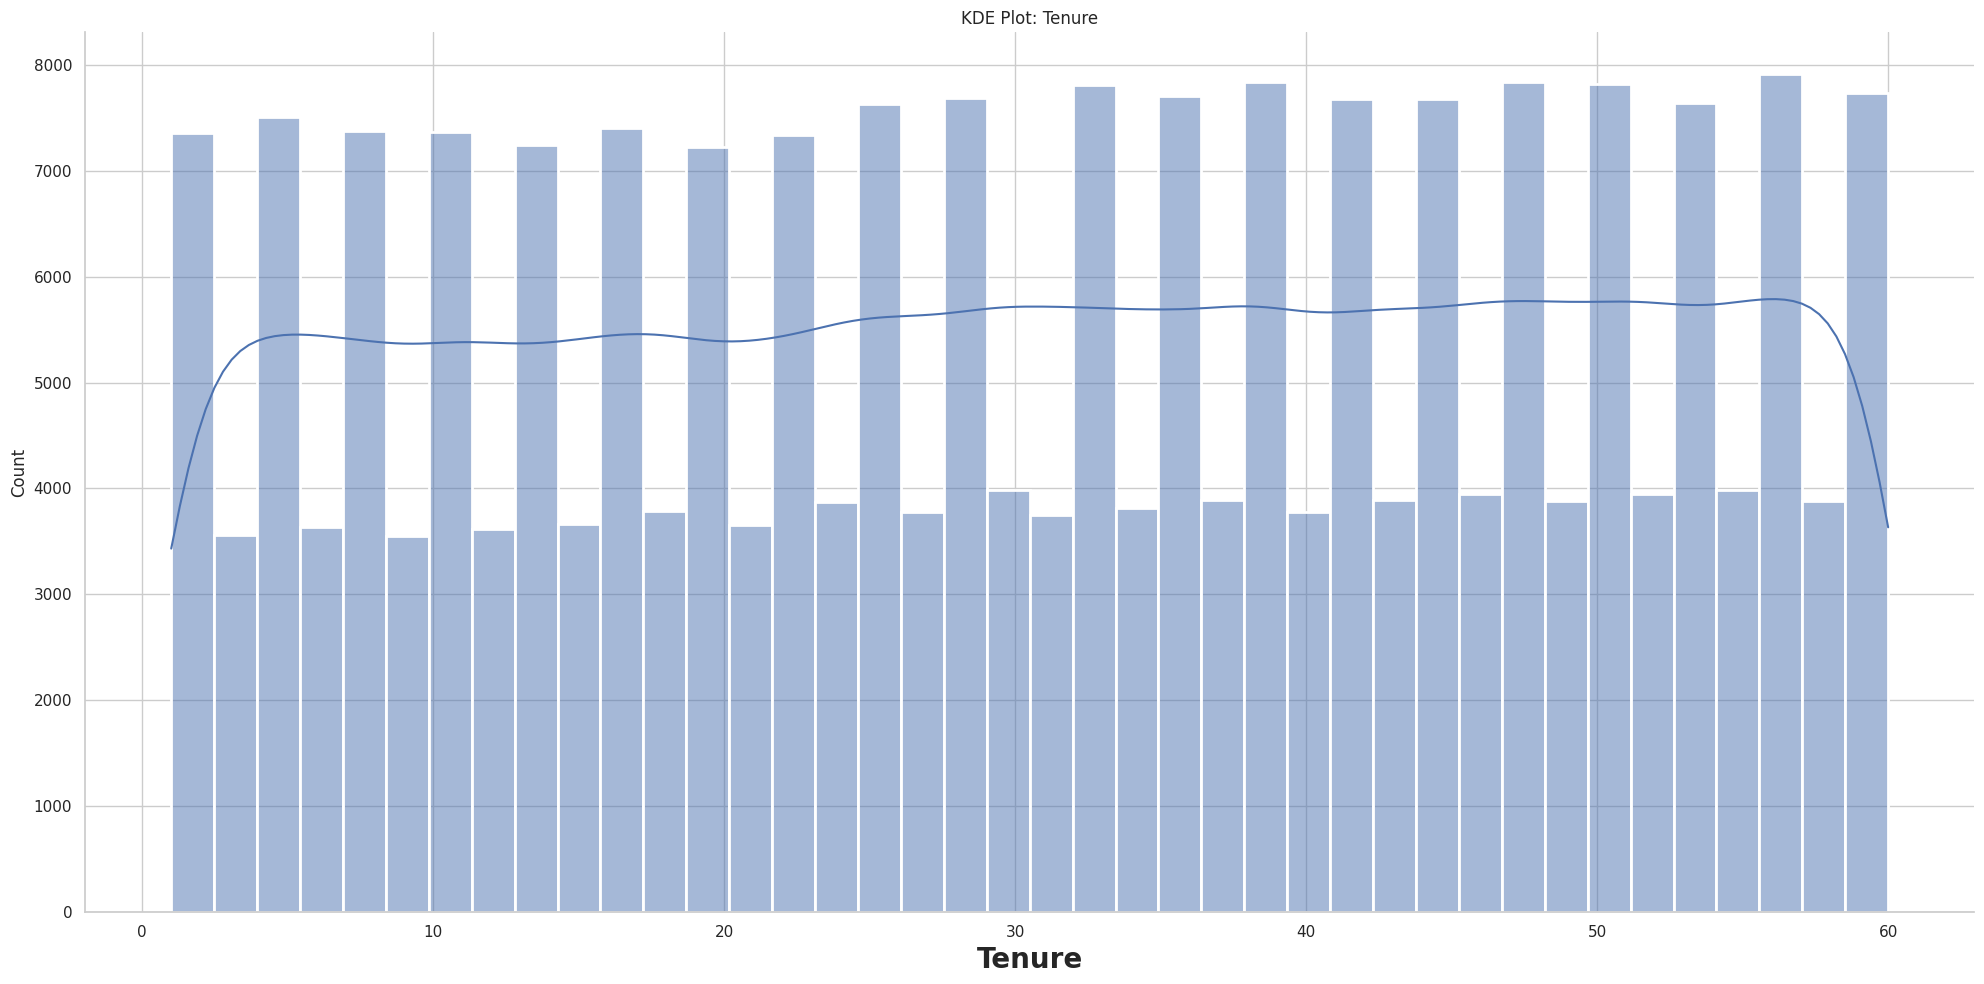

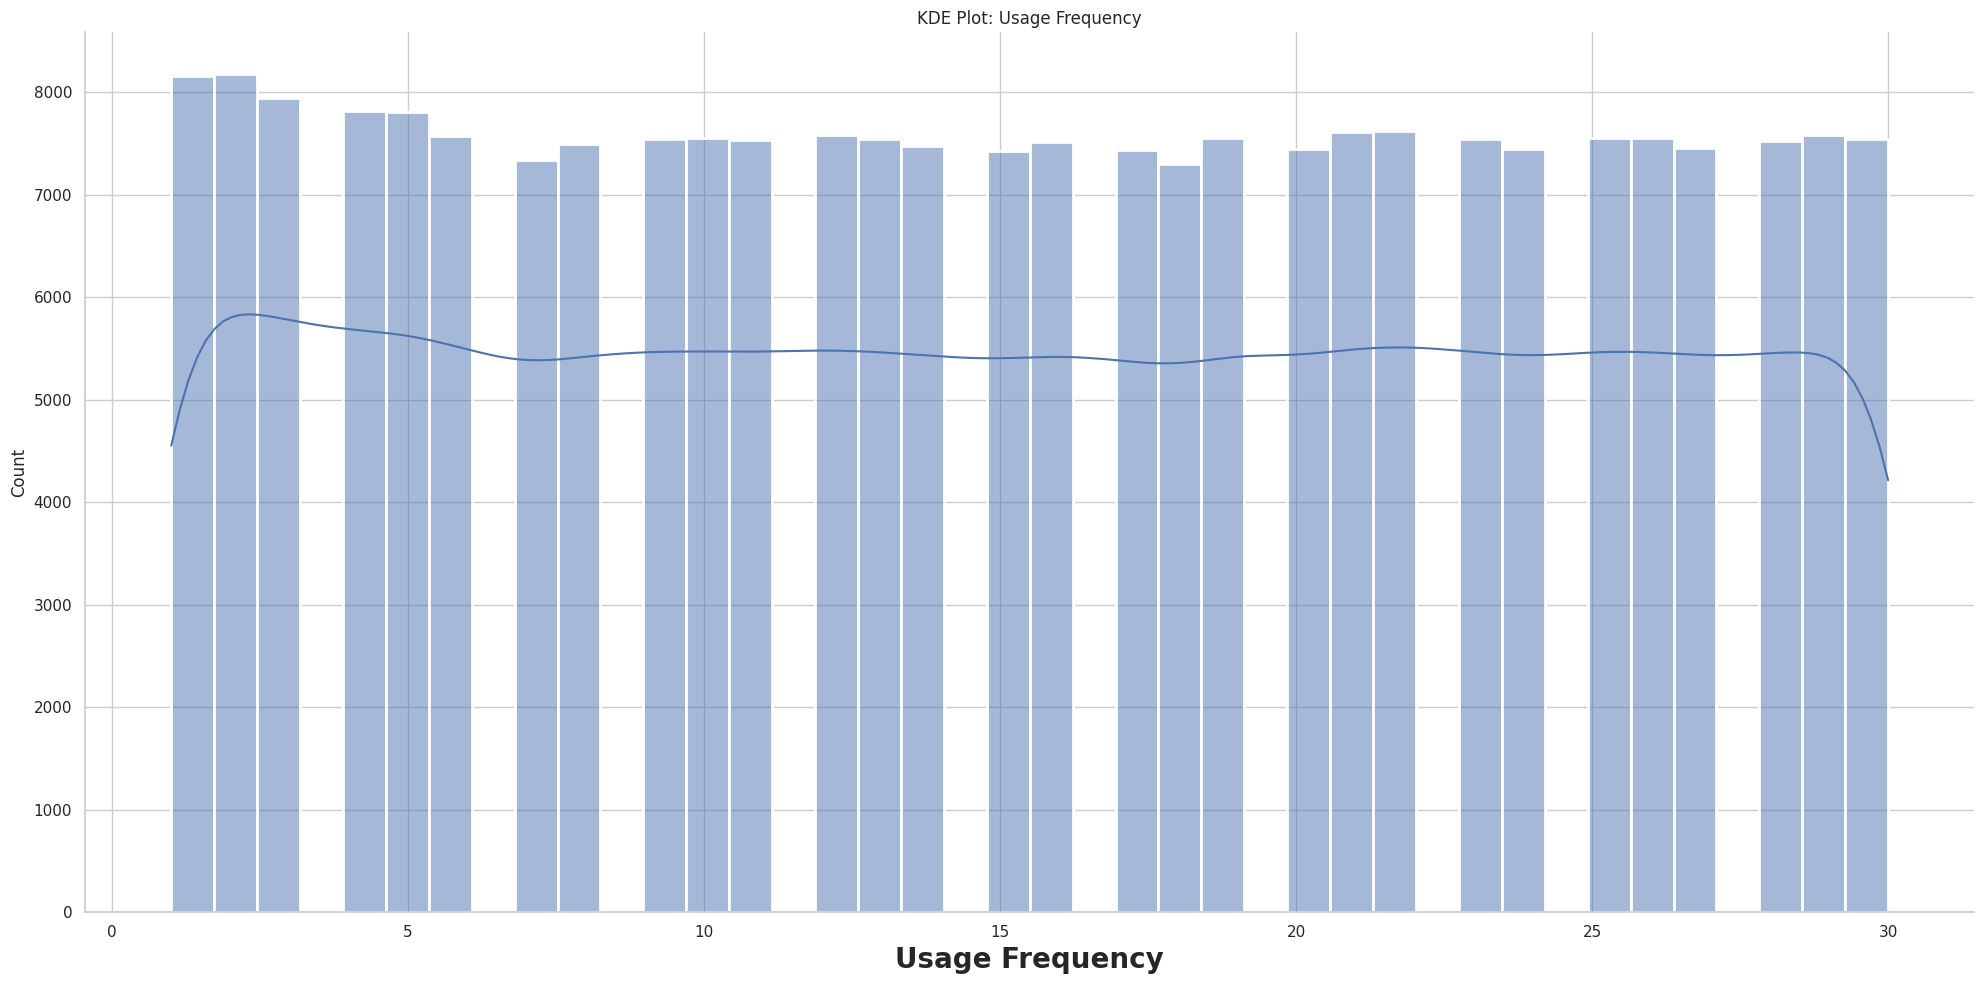

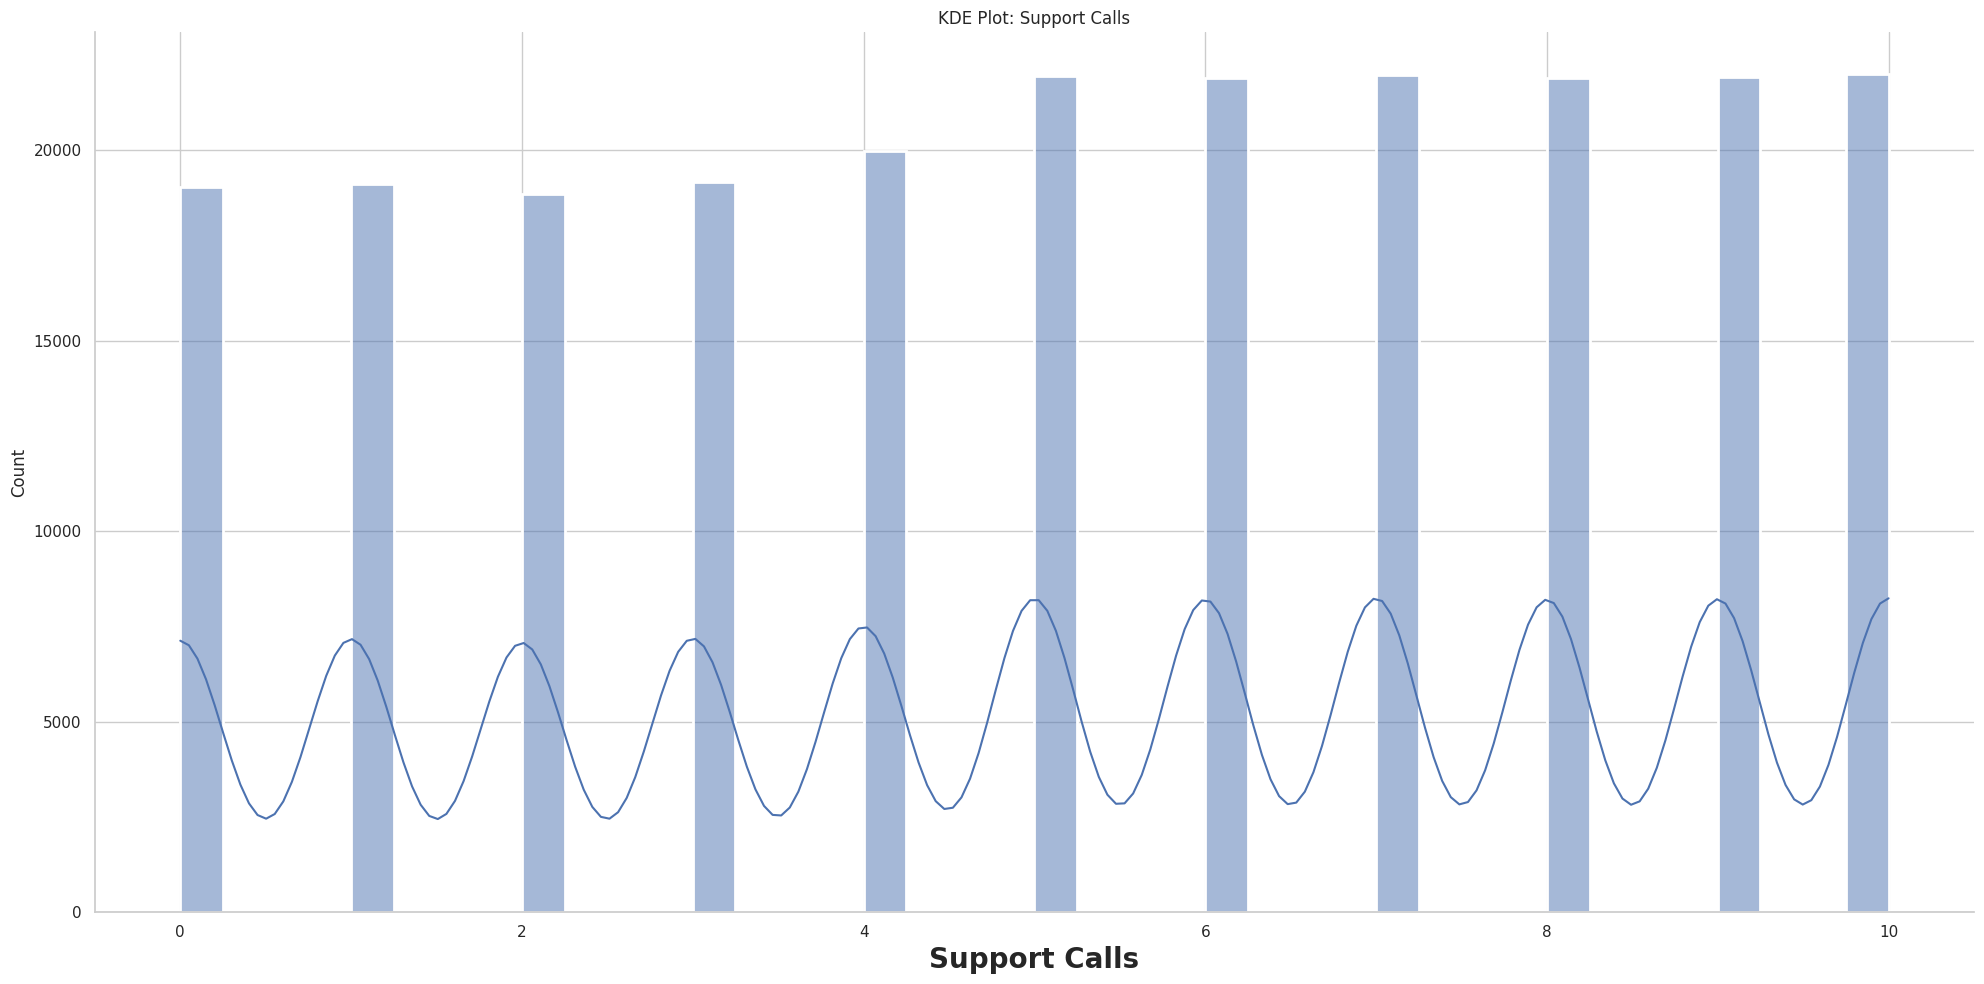

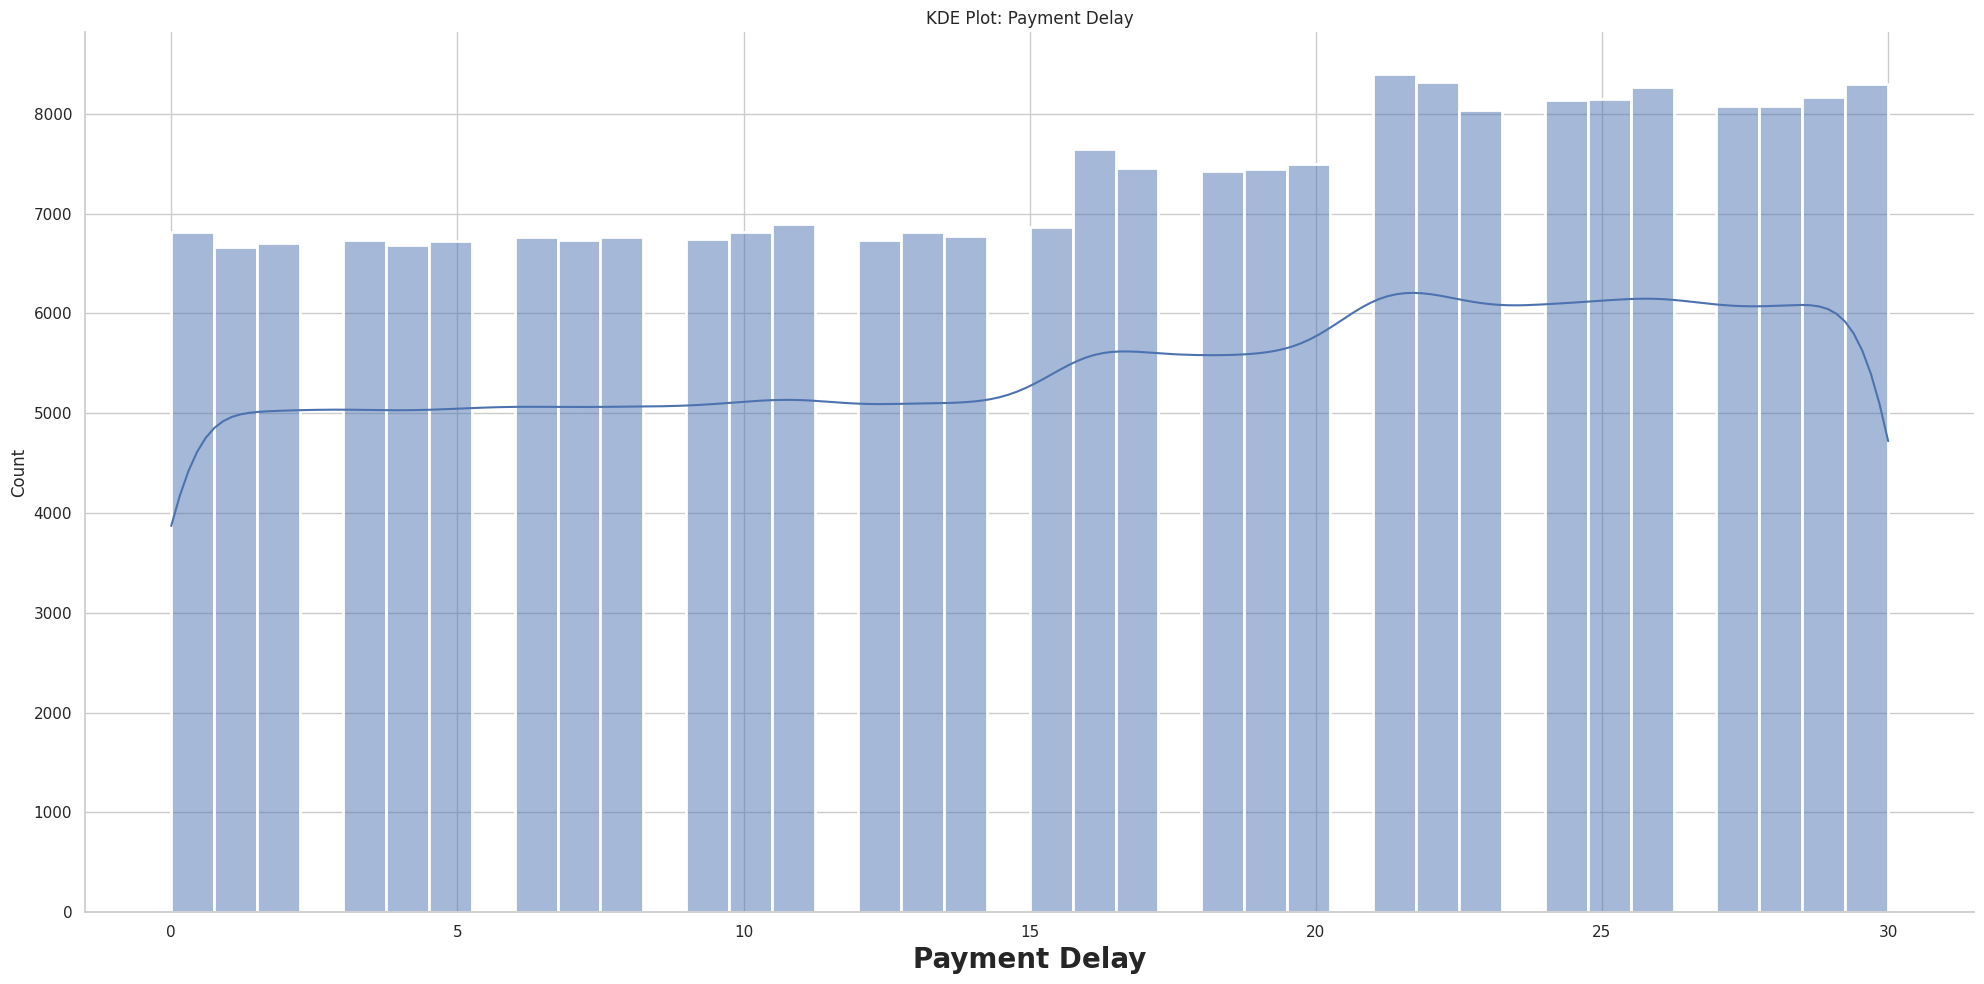

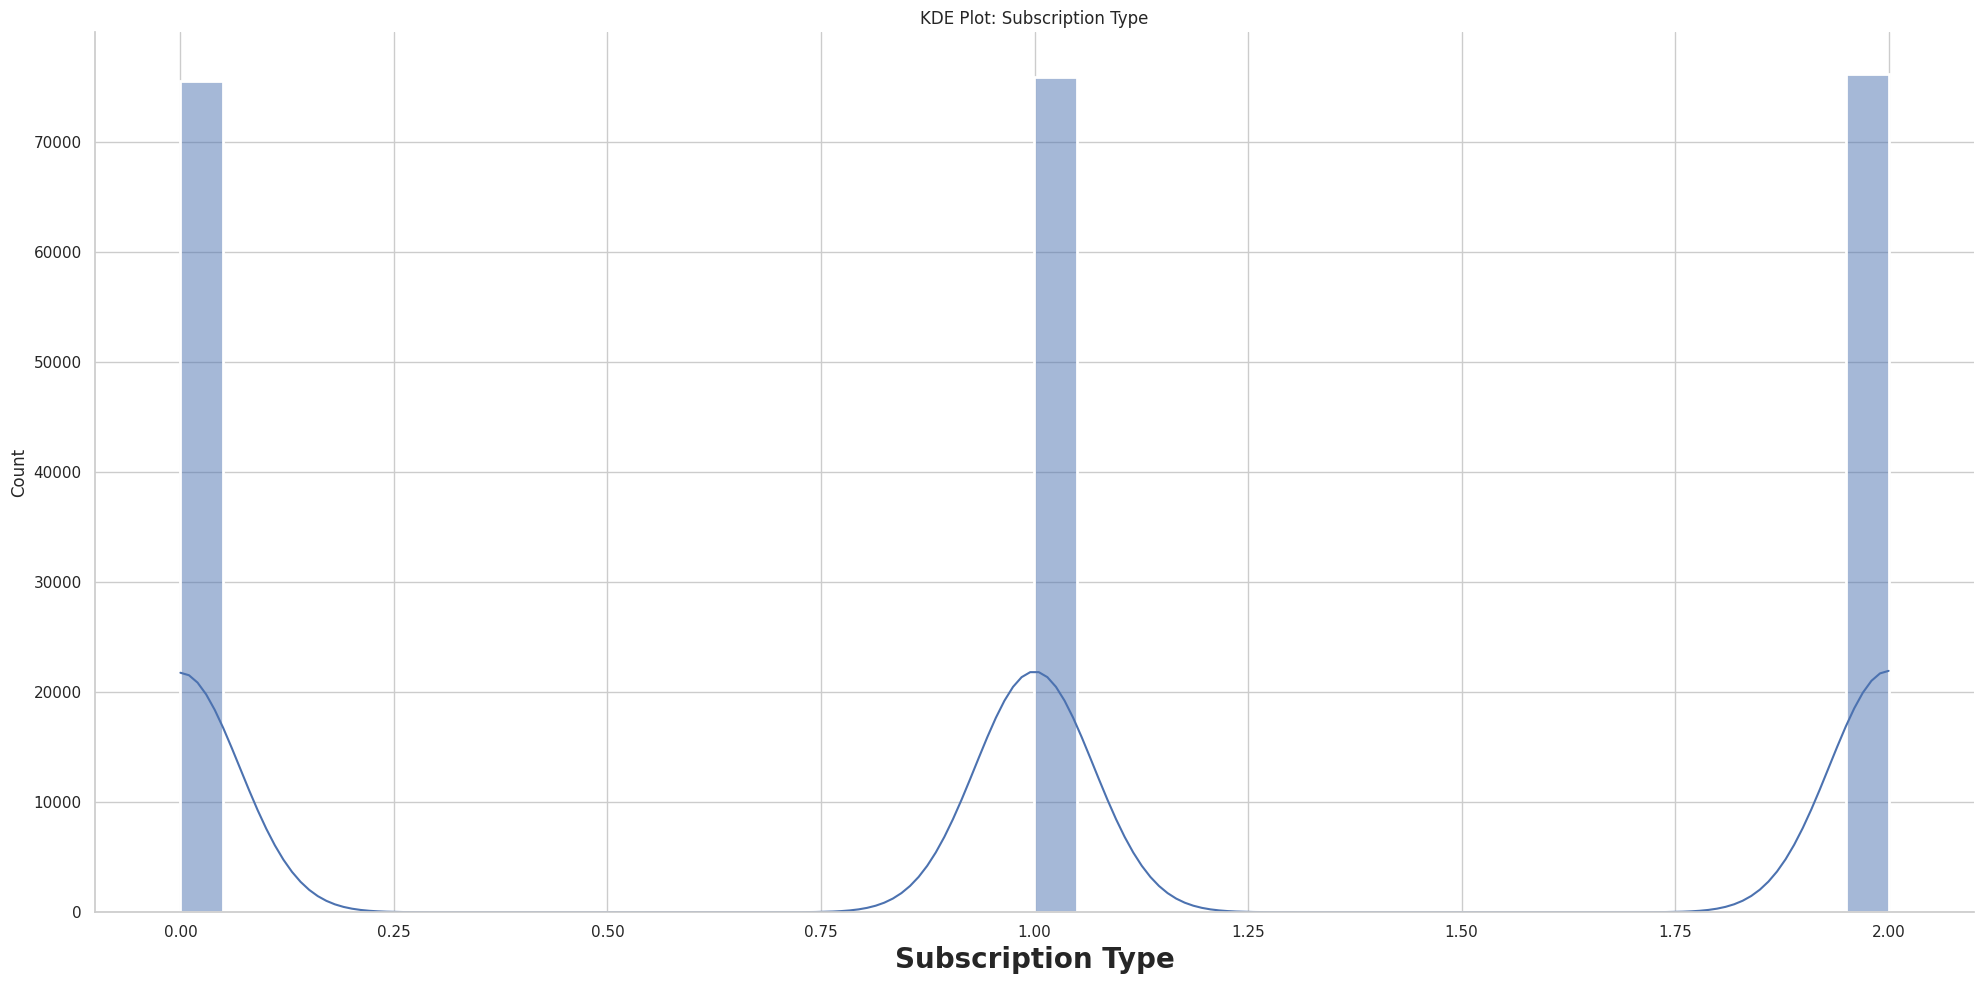

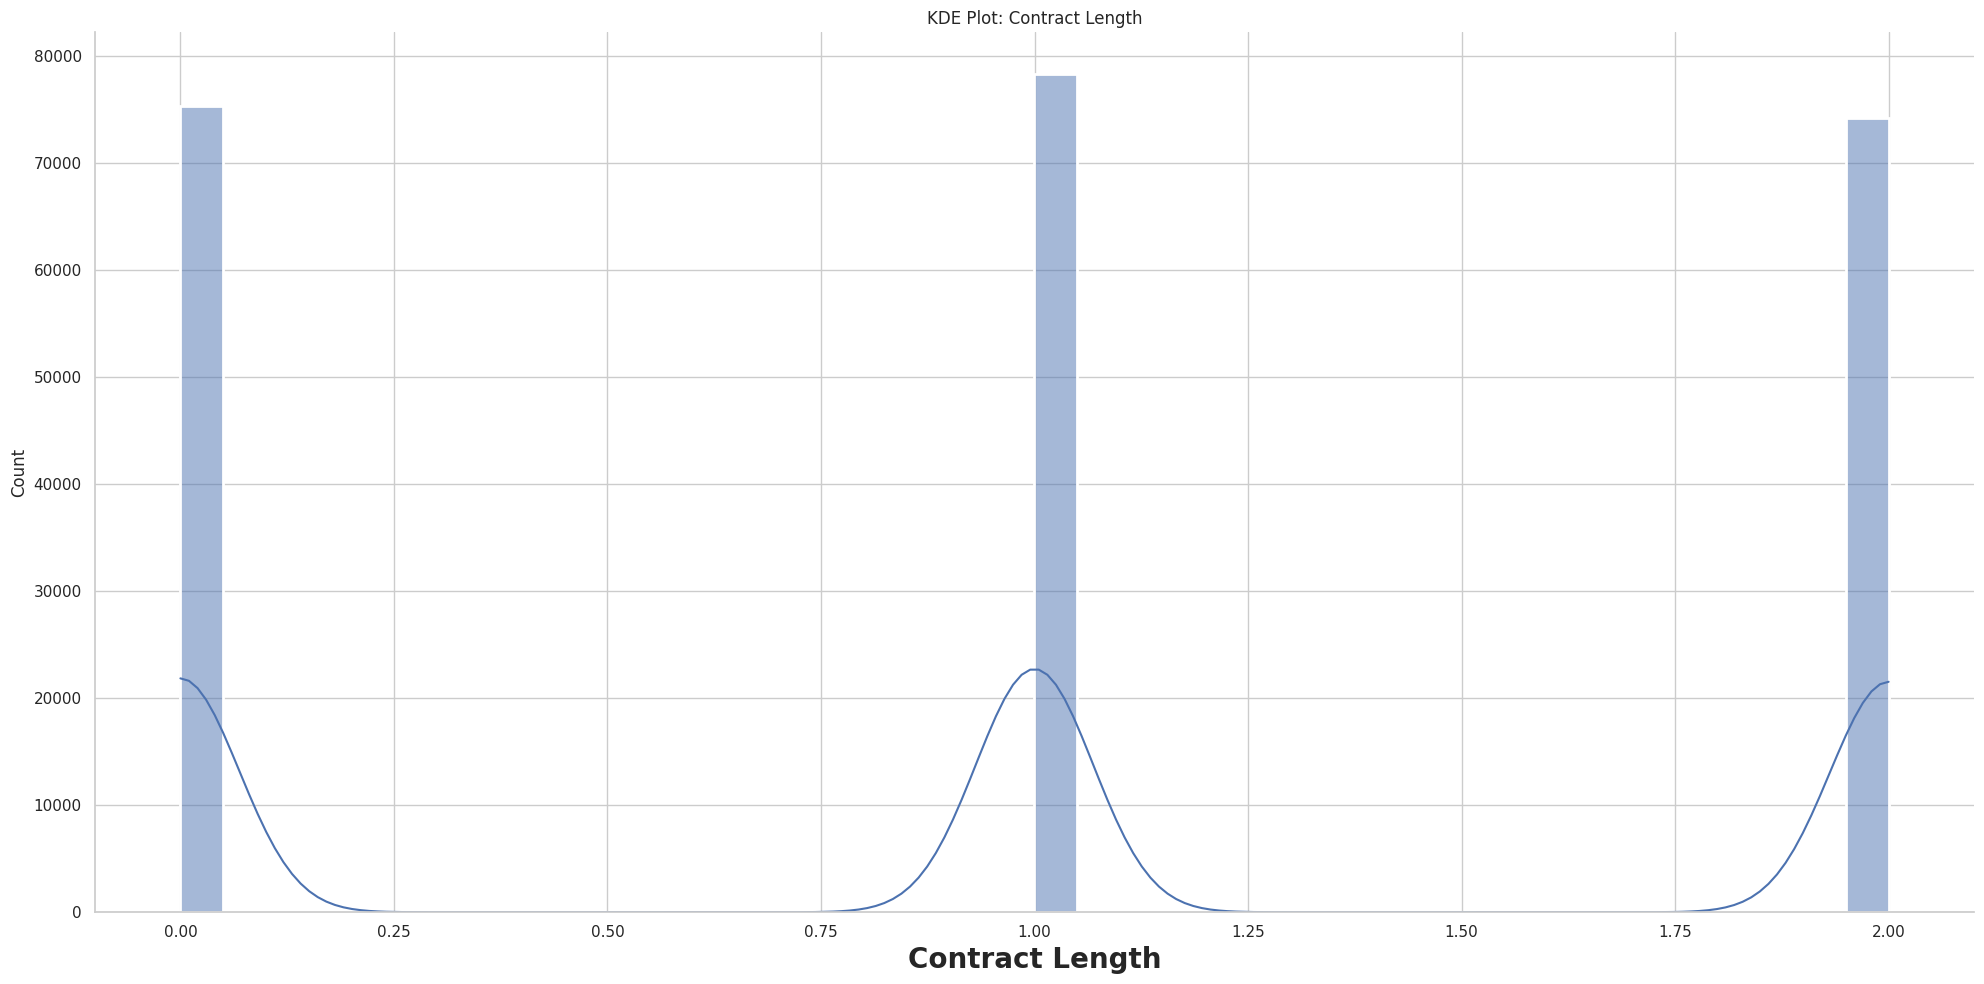

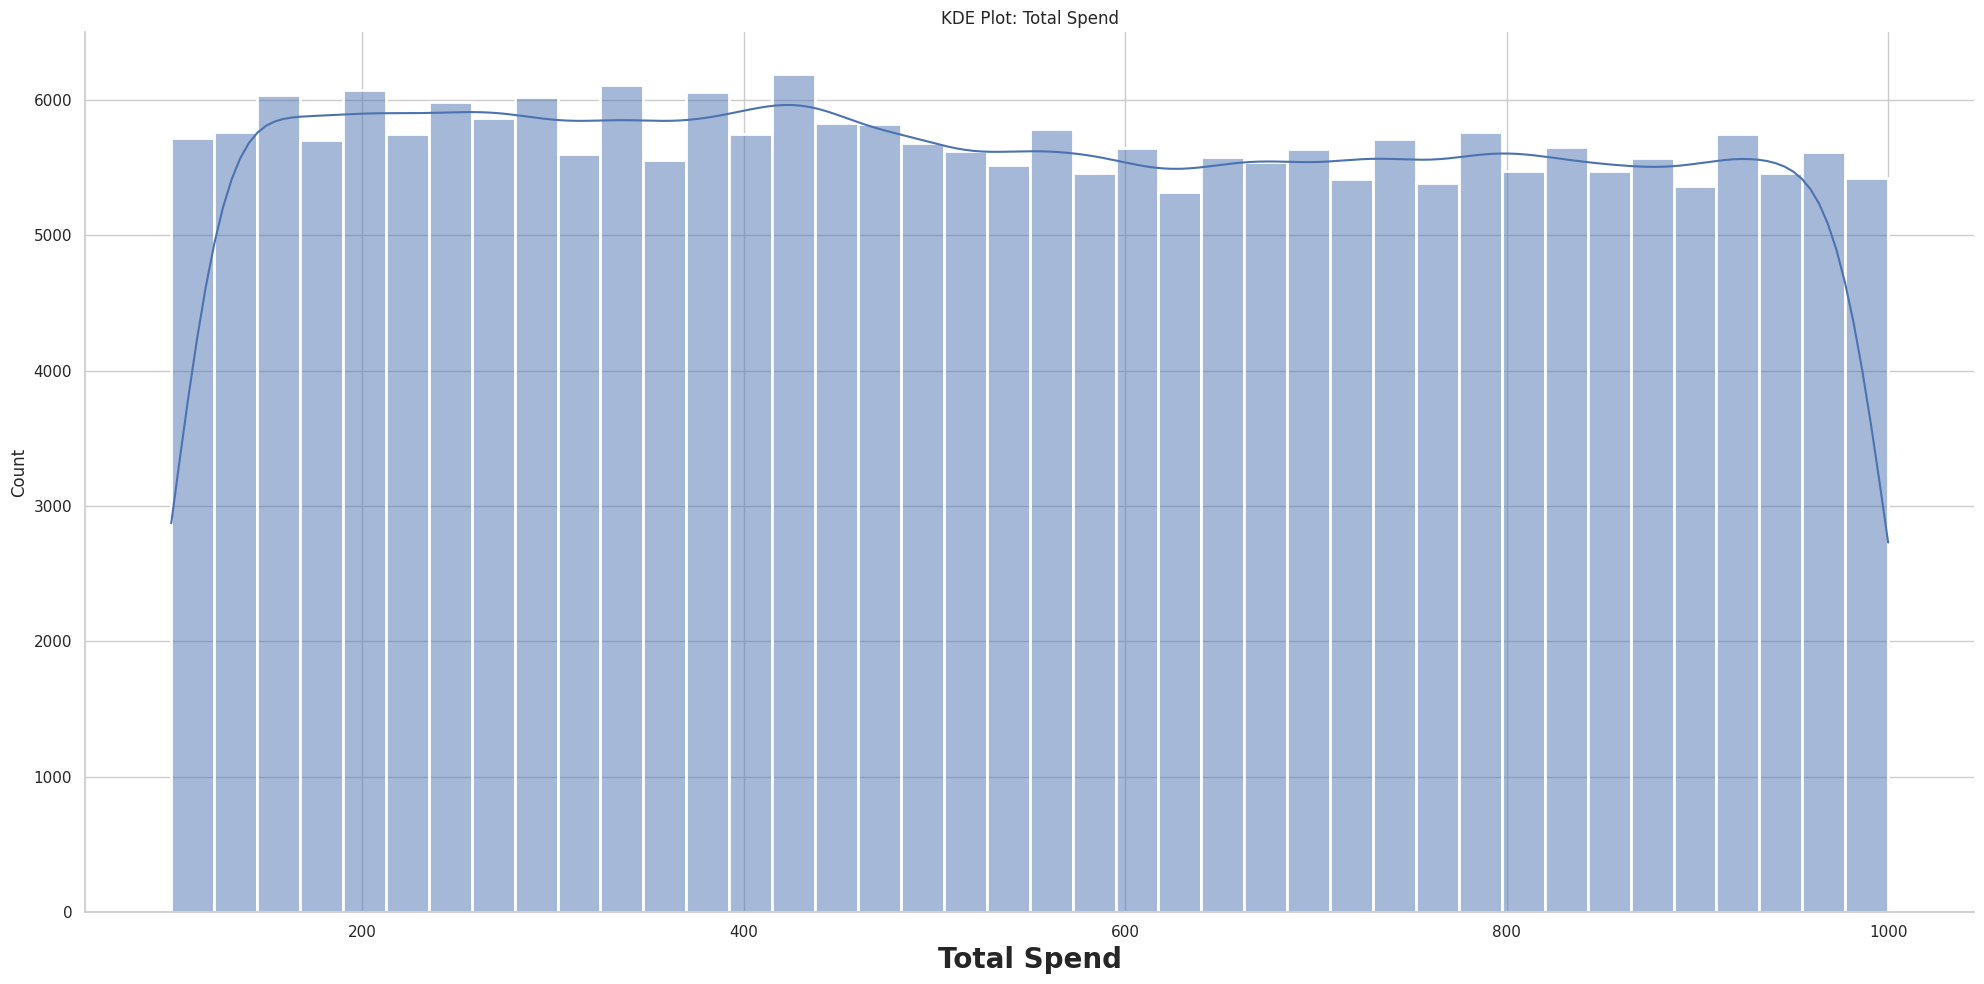

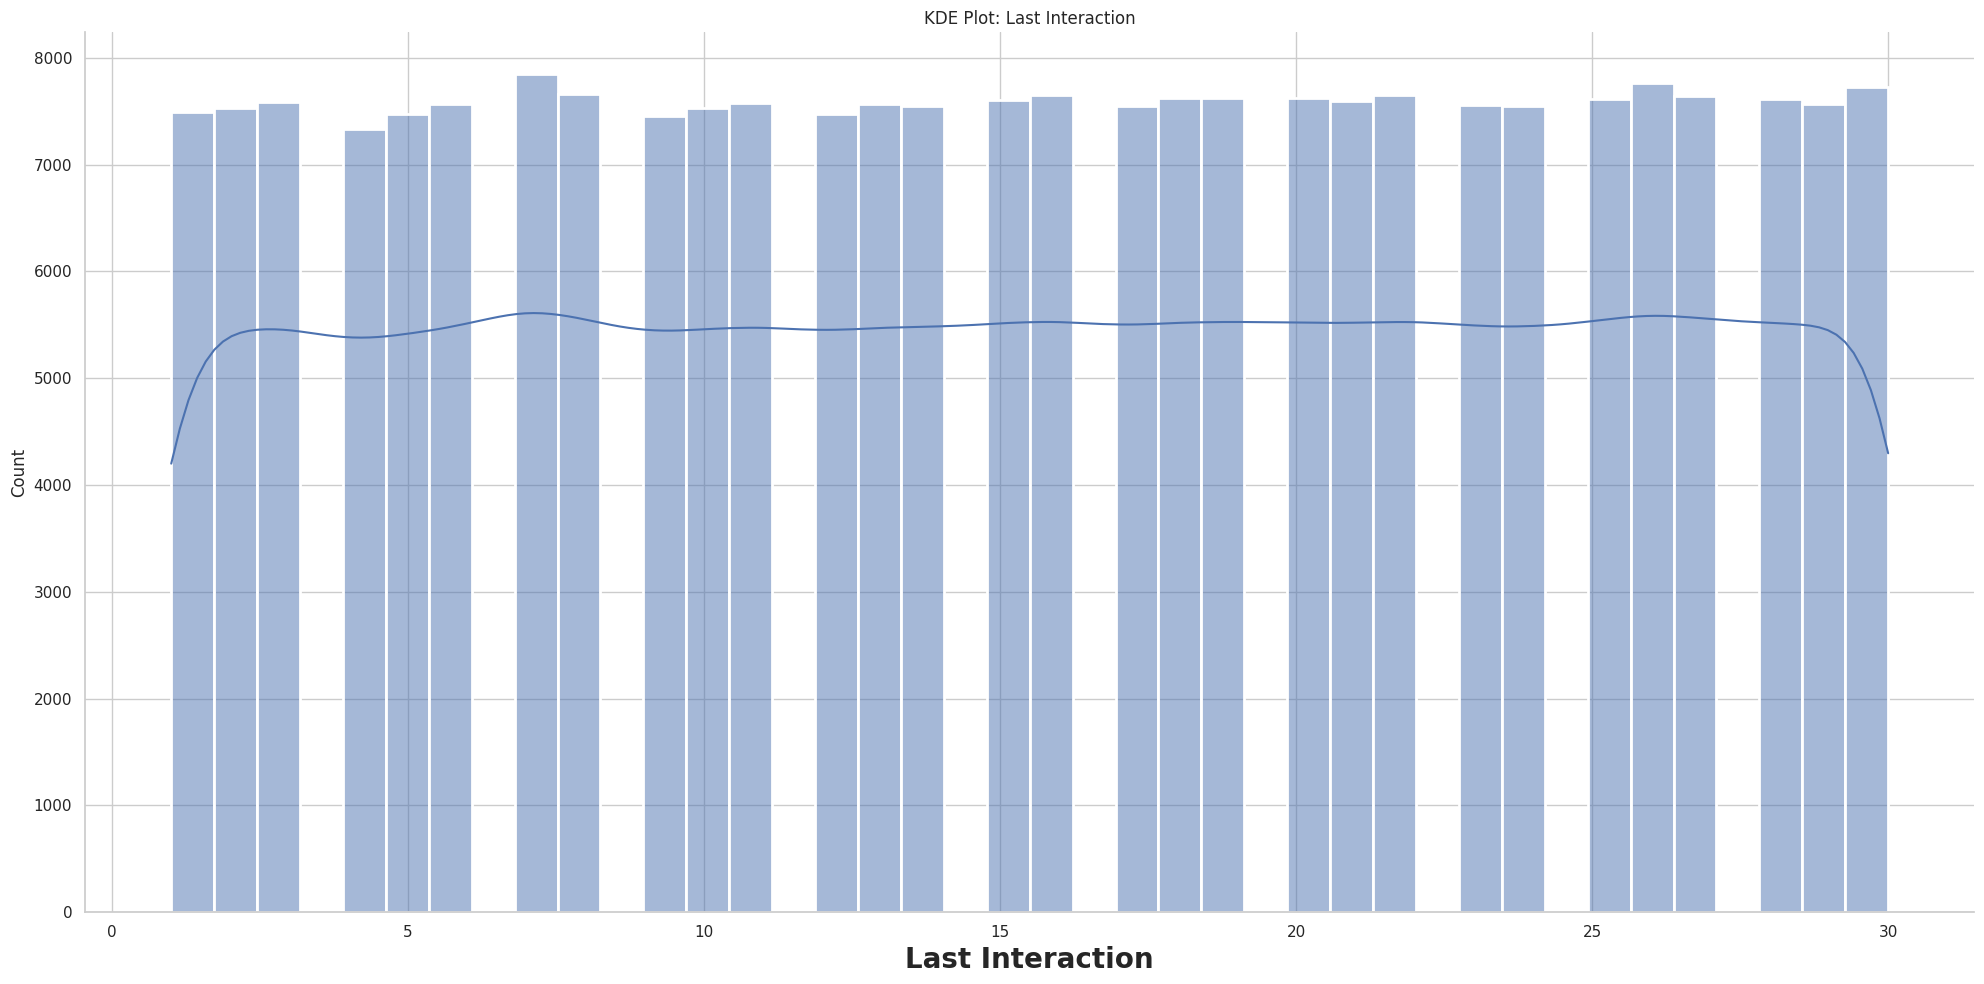

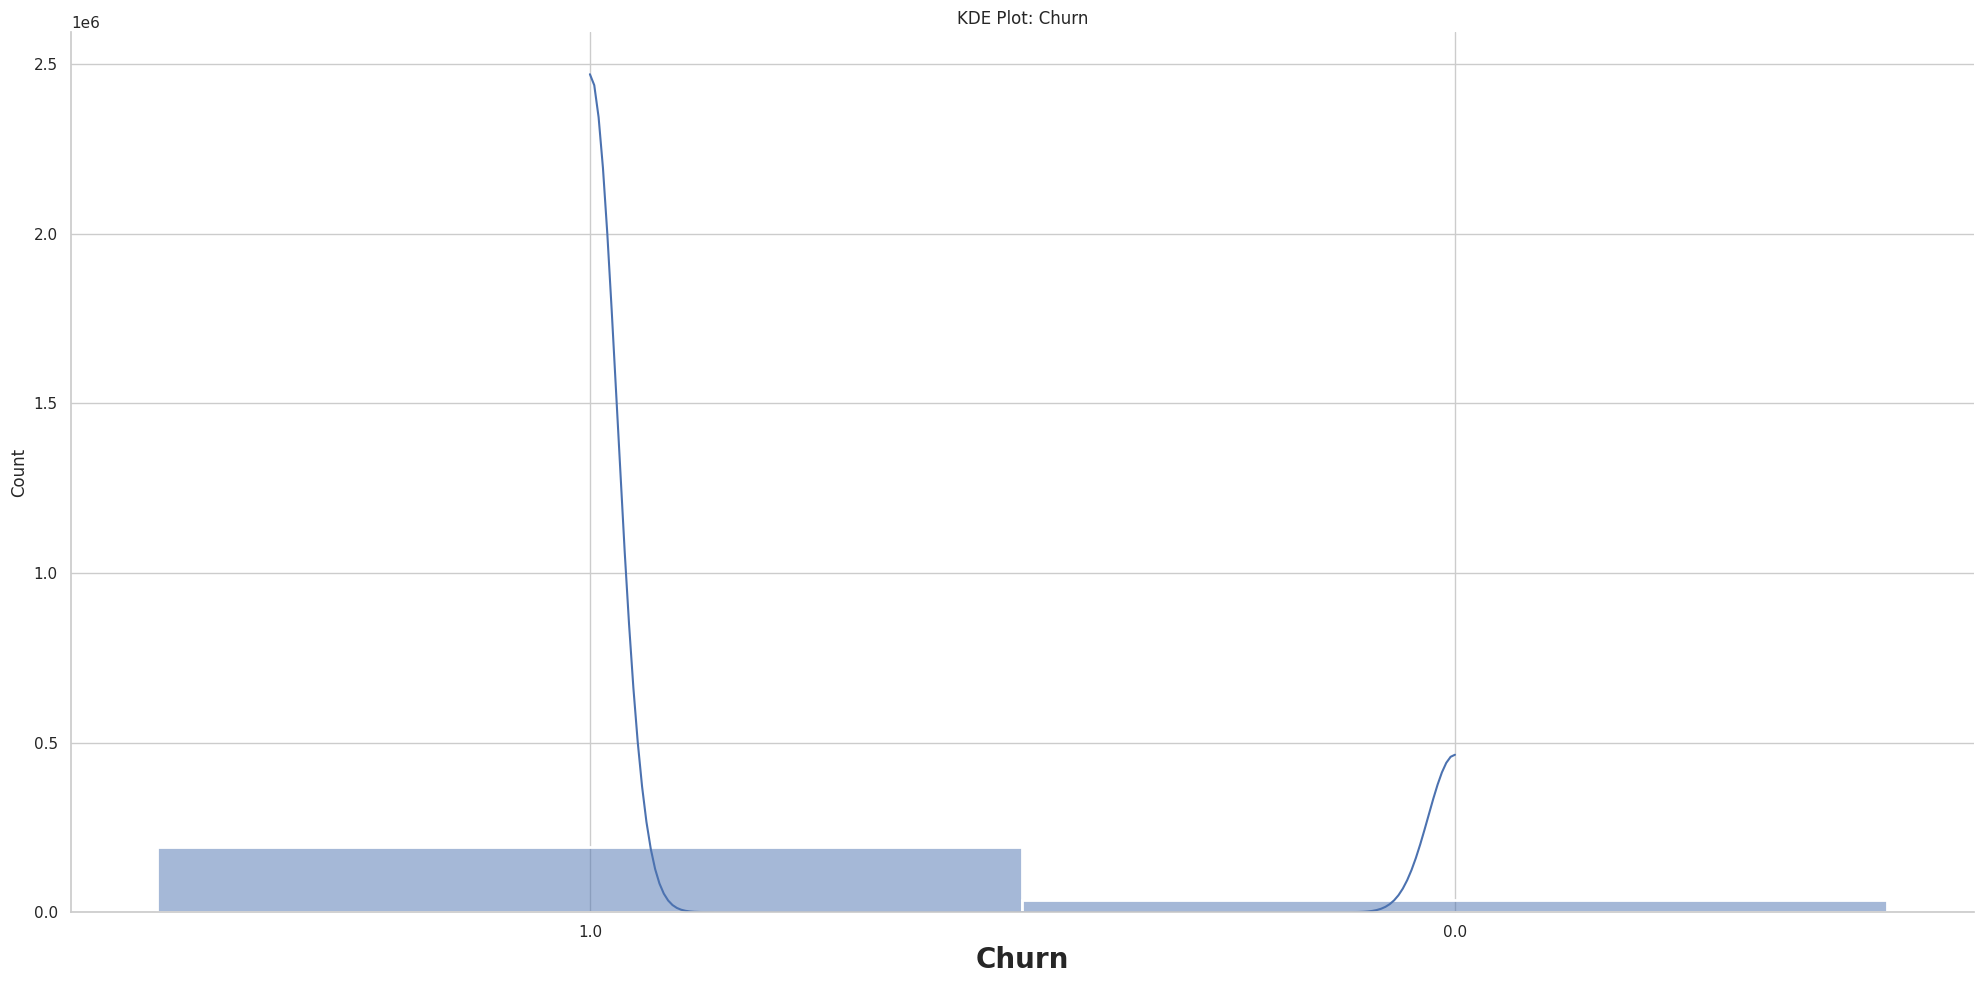

In [61]:
for feature in numerical_features:
    plot_dis(df, feature)